# Splines
## Daten einlesen

In [1]:
import os

import pandas as pd

from src.dataPipeline import DataPipeline

os.chdir('..')

In [2]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, basic_house_imputer=True, imputer=imputer)
#df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [3]:
df.head()

Floor  ForestDensityL  ForestDensityM  ForestDensityS  \
0  2.193811        1.615147        0.908239        0.074500   
1 -0.675234        1.615147        0.908239        0.074500   
2  0.759288       -0.122414       -0.154019       -0.469891   
3 -0.675234        1.615147        0.908239        0.074500   
4 -0.675234        0.729361        0.868246        0.410488   

   NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
0               -0.512866               -0.388248               -0.246234   
1               -0.512866               -0.388248               -0.246234   
2               -0.512866               -0.388248               -0.246234   
3               -0.512866               -0.388248               -0.246234   
4               -0.512866               -0.388248               -0.246234   

   NoisePollutionRoadL  NoisePollutionRoadM  NoisePollutionRoadS  ...  \
0            -1.431708            -1.556591            -1.264134  ...   
1            -1.431708            -1.556591            -1.264134  ...   
2             0.781850             0.950675             0.061176  ...   
3            -1.431708            -1.556591            -1.264134  ...   
4            -0.830029            -1.030851            -0.360634  ...   

   region_group_40  region_group_41  region_group_42  region_group_43  \
0        -0.130135        -0.038656        -0.101047        -0.159744   
1        -0.130135        -0.038656        -0.101047        -0.159744   
2        -0.130135        -0.038656        -0.101047        -0.159744   
3        -0.130135        -0.038656        -0.101047        -0.159744   
4        -0.130135        -0.038656        -0.101047        -0.159744   

   region_group_44  region_group_45  region_group_46  region_group_47  \
0        -0.082955        -0.143288        -0.152795        -0.105335   
1        -0.082955        -0.143288        -0.152795        -0.105335   
2        -0.082955        -0.143288        -0.152795        -0.105335   
3        -0.082955        -0.143288        -0.152795        -0.105335   
4        -0.082955        -0.143288        -0.152795        -0.105335   

   region_group_48  region_group_49  
0        -0.210429        -0.144854  
1        -0.210429        -0.144854  
2        -0.210429        -0.144854  
3        -0.210429        -0.144854  
4        -0.210429        -0.144854  

[5 rows x 150 columns]

In [4]:
#from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

#df = unpickle_dataframe('df_with_bert_feature.pkl')
#df_kaggle = unpickle_dataframe('df_kaggle_with_bert_feature.pkl')

## Modell Training
Da wir sehr viele Spalten verwenden, wird das Modell eher gross. Deshalb wird das Training hier eher lange dauern.
Das Modell wird mit term='auto' initialisiert, um die Anzahl der Spline-Terme automatisch zu bestimmen. Ebenfalls trainieren wir das Modell mit einem Gridsearch.

Achtung: Laufzeit dieses Codeblocks ist etwa 6 Minuten.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s
from sklearn.metrics import mean_absolute_percentage_error

y = df['price_cleaned']
y_log = np.log(y)
X = df.drop(columns=['price_cleaned'])

train_test_split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)

# Transforming and reshaping pandas dataframes to numpy arrays 
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

if X_train_np.ndim == 1:
    X_train_np = X_train_np.reshape(-1, 1)
if X_test_np.ndim == 1:
    X_test_np = X_test_np.reshape(-1, 1)

# Uses gridsearch and term='auto'
model = LinearGAM().gridsearch(X_train_np, y_train)

model.fit(X_train_np, y_train)

y_pred = model.predict(X_test_np)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

mape_test = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f'Test MAPE: {mape_test:.3f}%')

# Train Mape
y_pred = model.predict(X_train_np)
y_train = np.exp(y_train)
y_pred = np.exp(y_pred)

mape_train = mean_absolute_percentage_error(y_train, y_pred) * 100

print(f'Train MAPE: {mape_train:.3f}%')

100% (11 of 11) |########################| Elapsed Time: 0:09:44 Time:  0:09:440:53


Test MAPE: 26.488%
Train MAPE: 27.807%


Die Ergebnisse sind okey. Aber wir haben wahrscheinlich zu viele Features.

In [6]:
# Funktion um die Ergebnisse für den Kaggle-Upload zu erstellen

#from src.utils.helperFunctions import create_kaggle_results

#results = model.predict(df_kaggle)
#results = np.exp(results)
#create_kaggle_results(results, csv_name='KNN_Regressor_with_bert_feature')

## Modell Interpretation
Die Einflüsse der einzelnen Features auf den Preis sind hier dargestellt. Interessante Features sind: 
- Space extracted: Kleine Wohnflächen haben einen starken negativen Einfluss auf den Preis. Ebenfalls ist die "Confidence" der vorhersage sehr gross.
- Year built: Ältere Häuser haben einen negativen Einfluss auf den Preis jedoch mit geringer Confidence.
- gde_foreigners_percentage: Eine geringe Anzahl Ausländer in der Gemeinde hat einen negativen Einfluss auf den Preis.

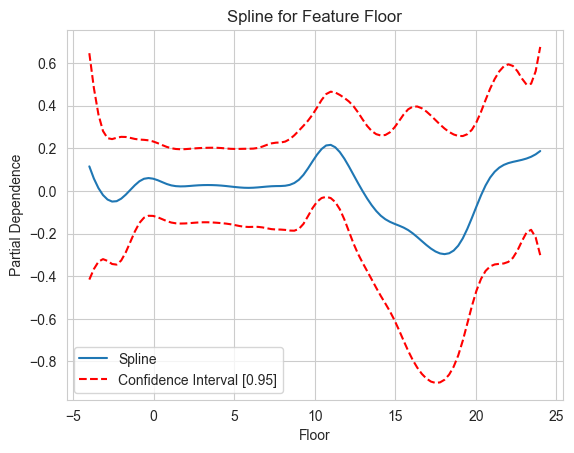

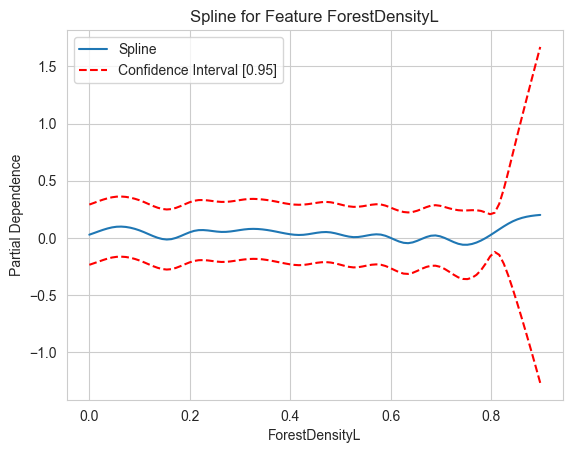

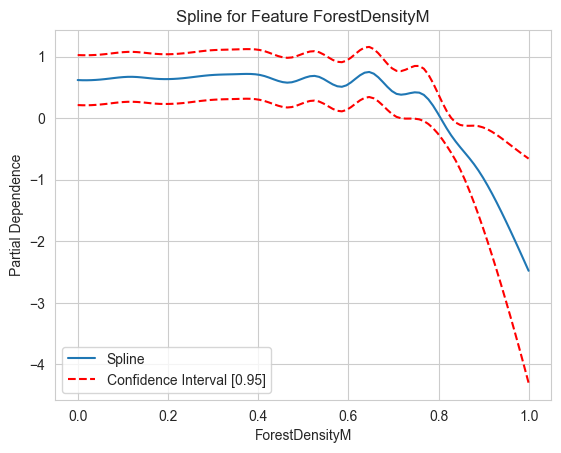

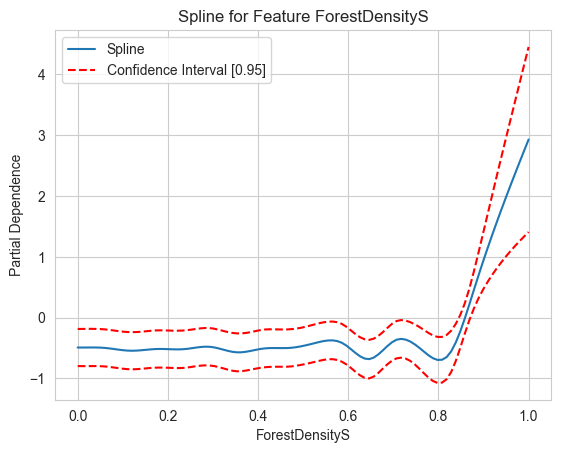

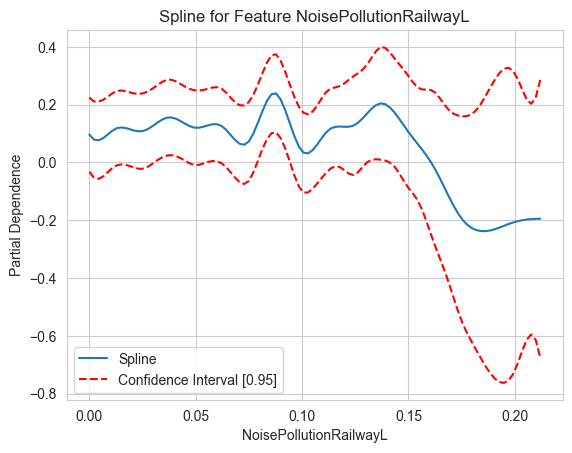

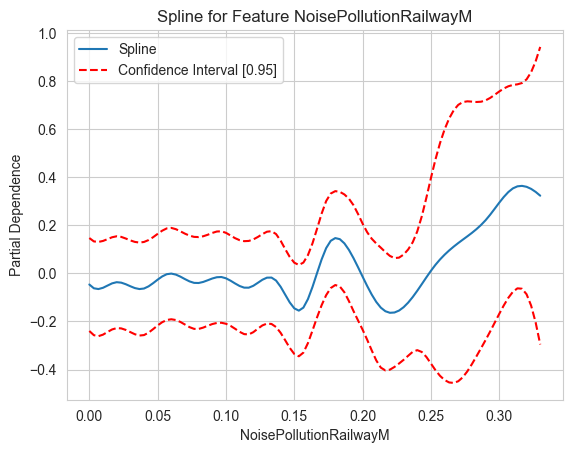

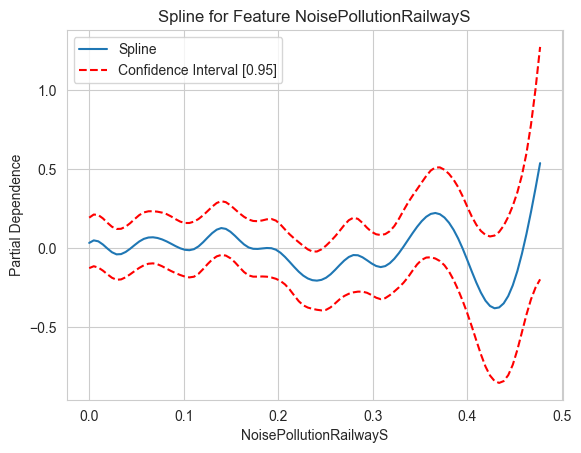

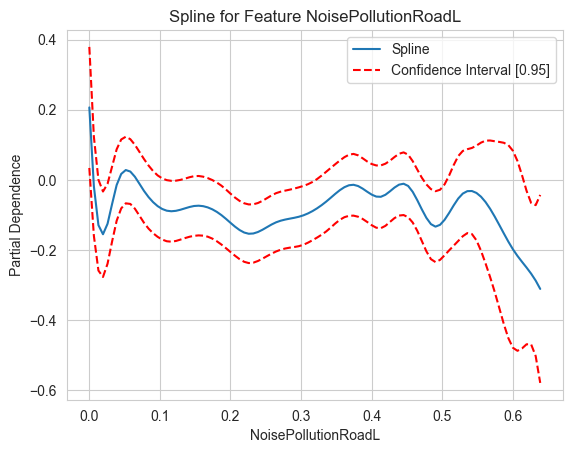

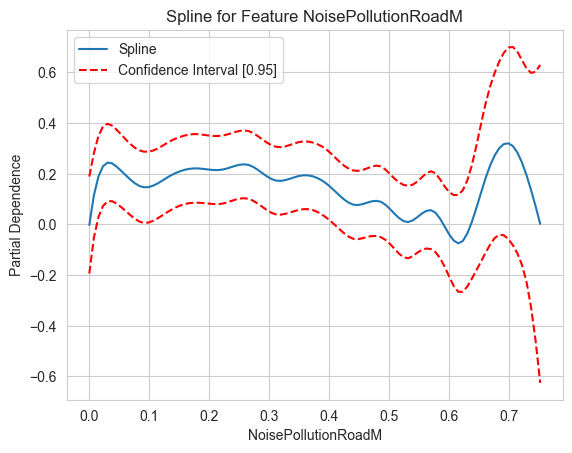

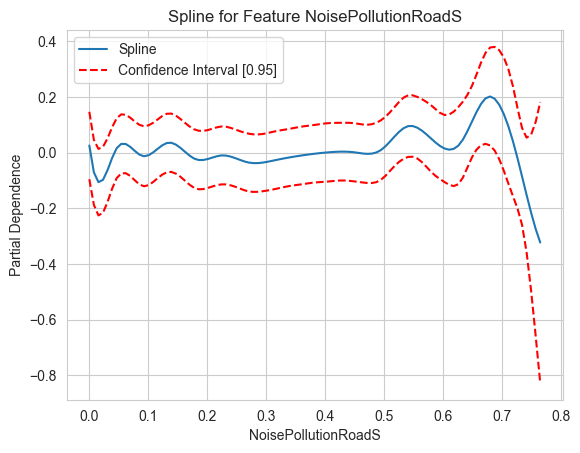

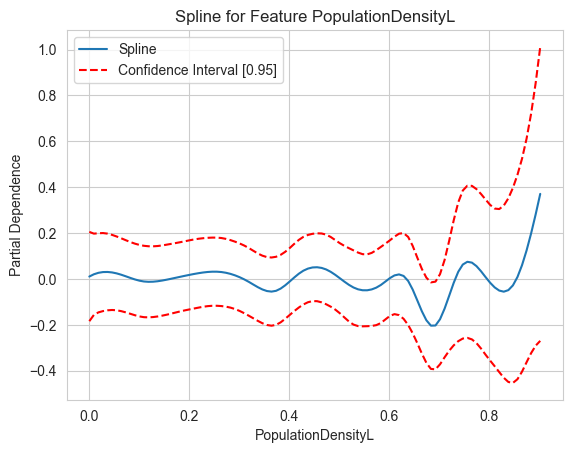

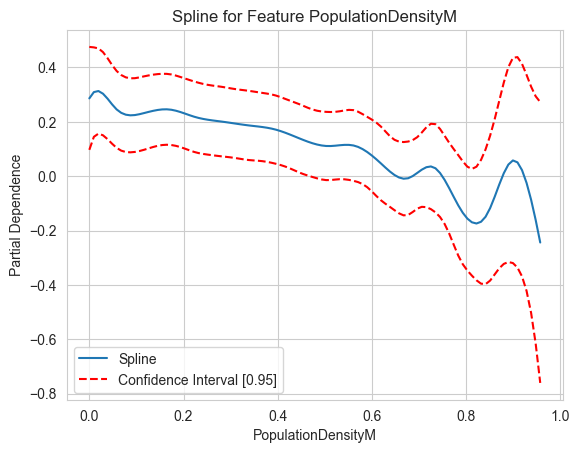

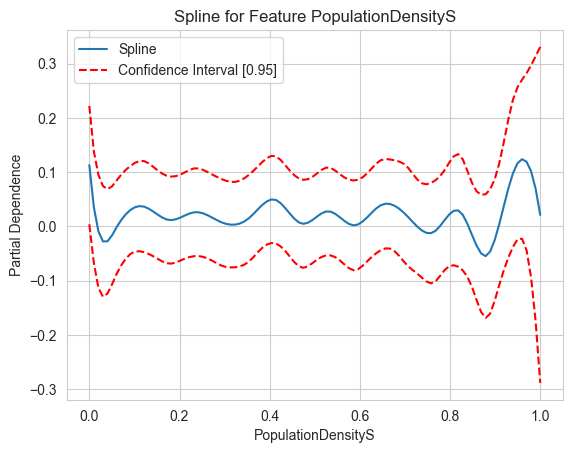

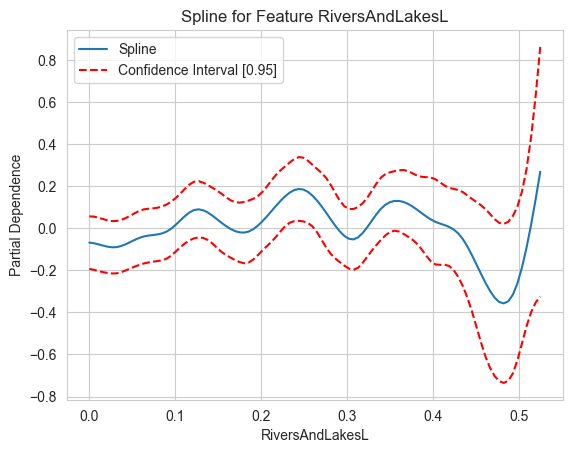

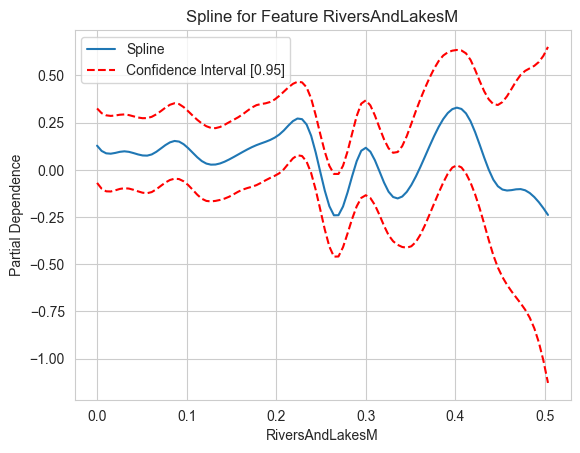

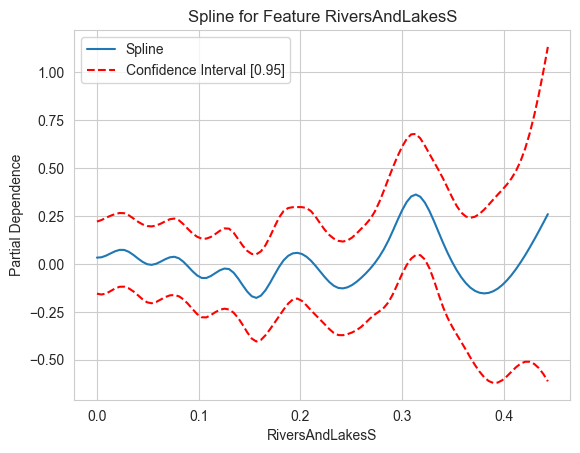

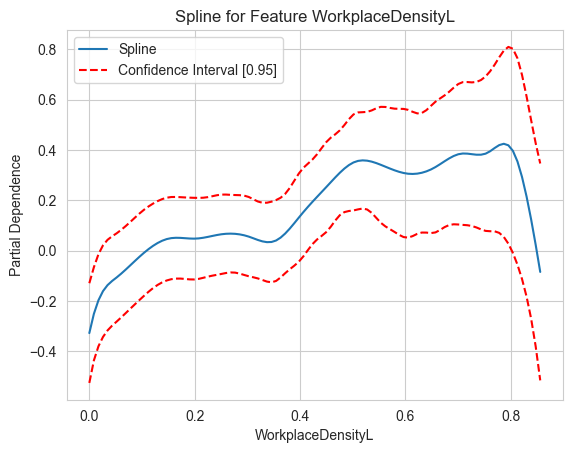

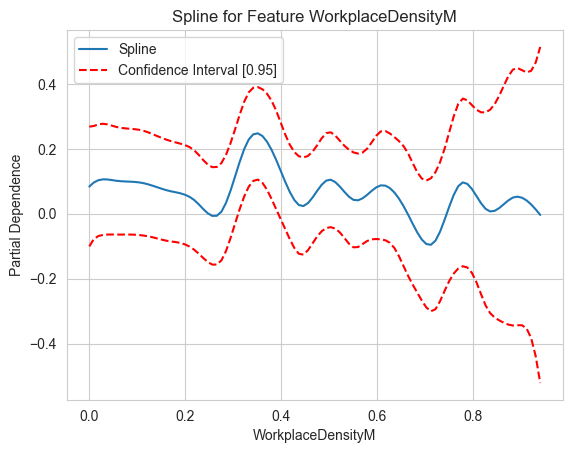

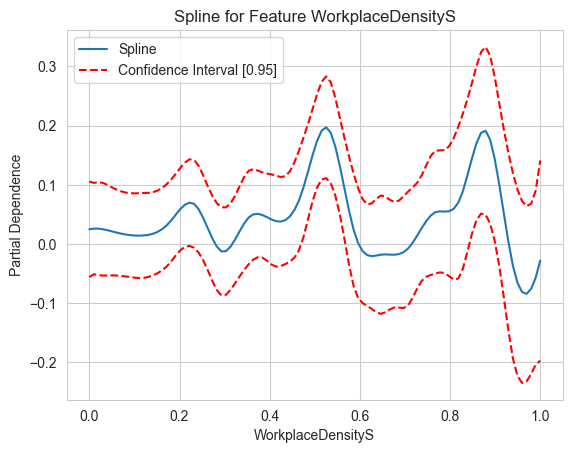

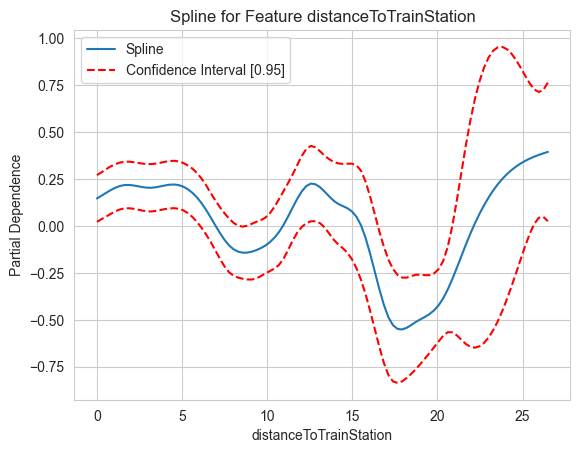

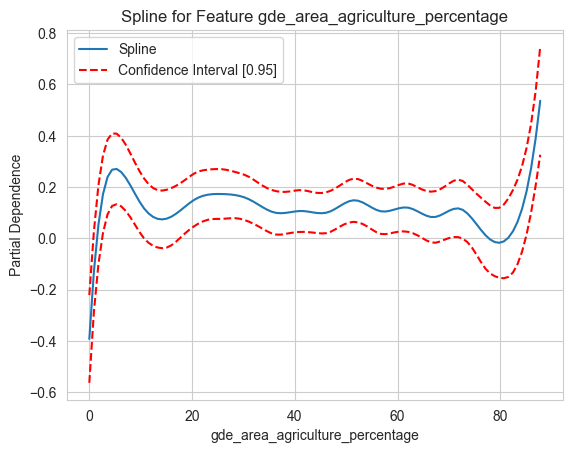

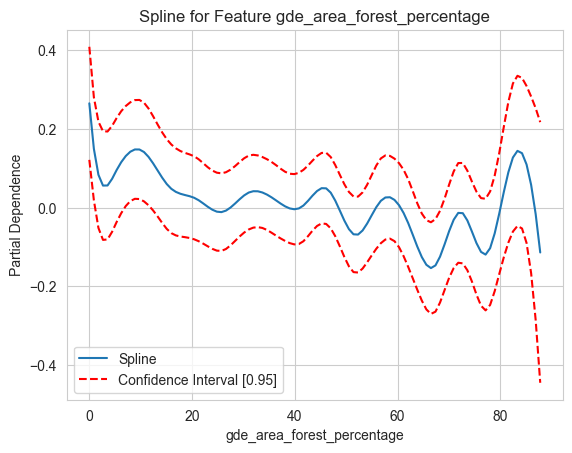

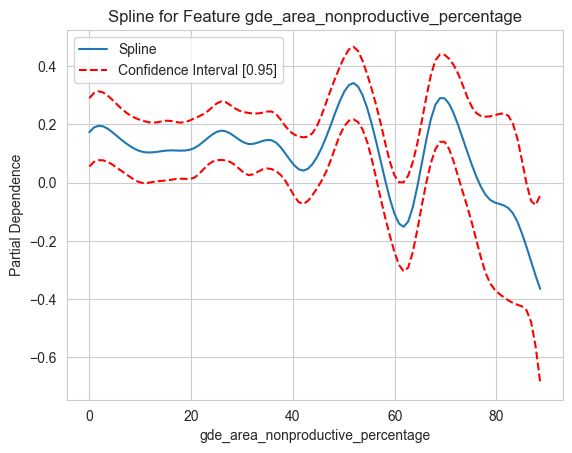

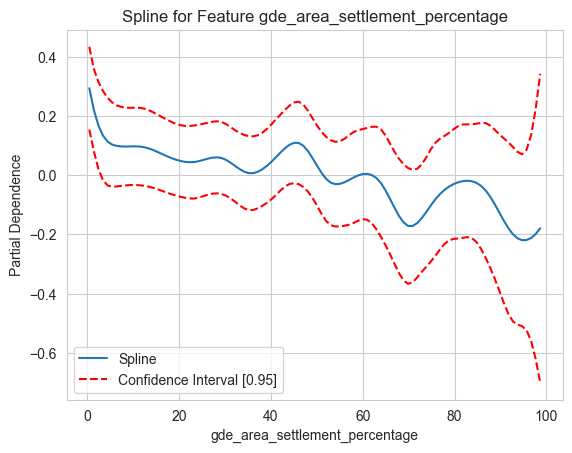

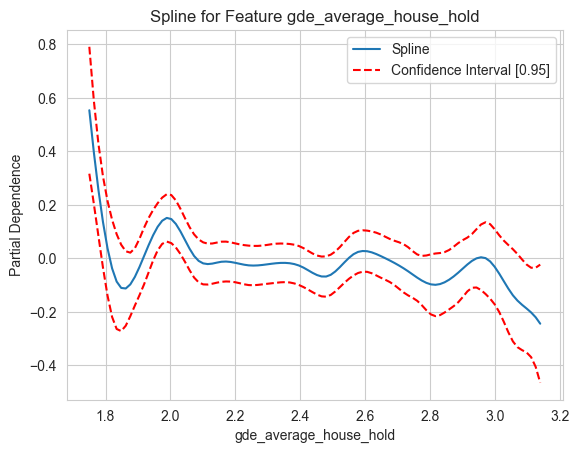

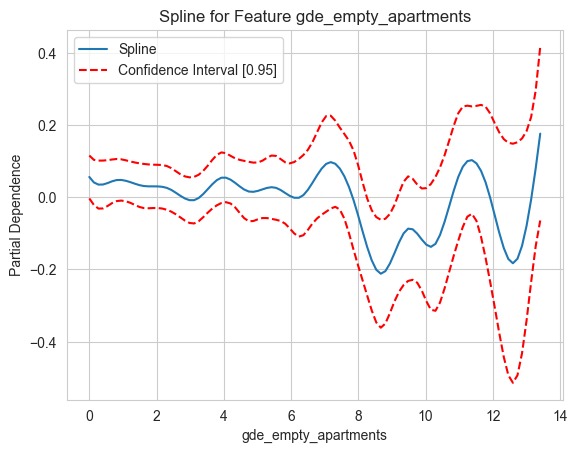

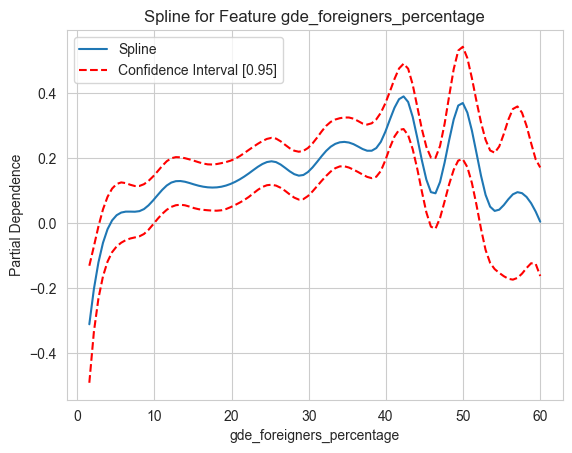

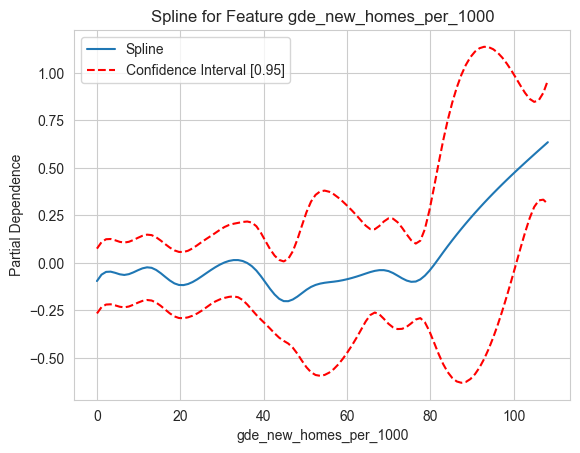

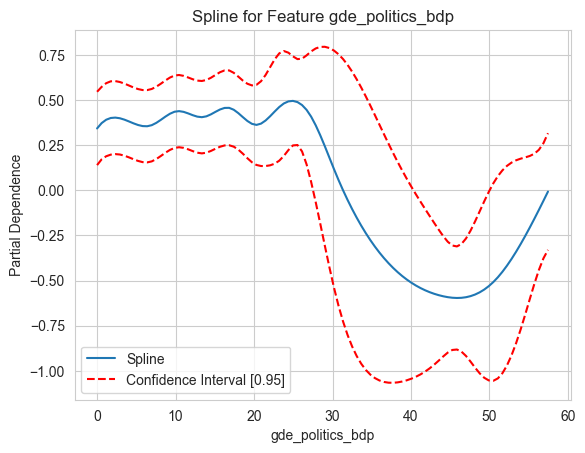

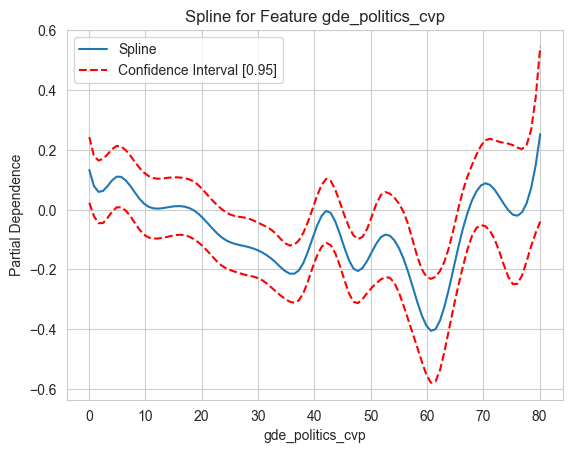

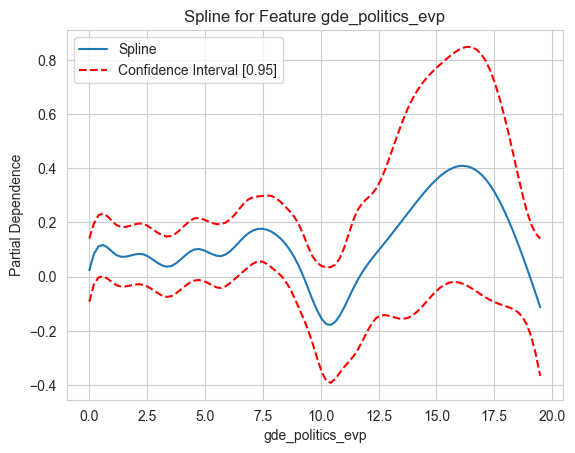

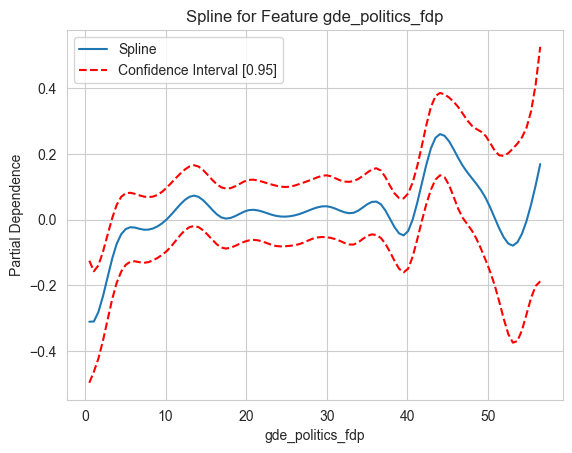

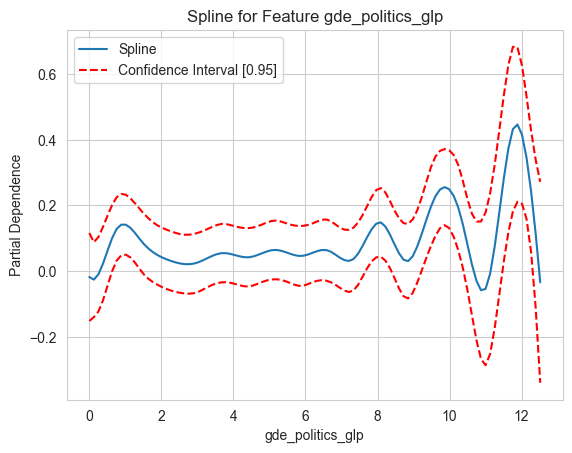

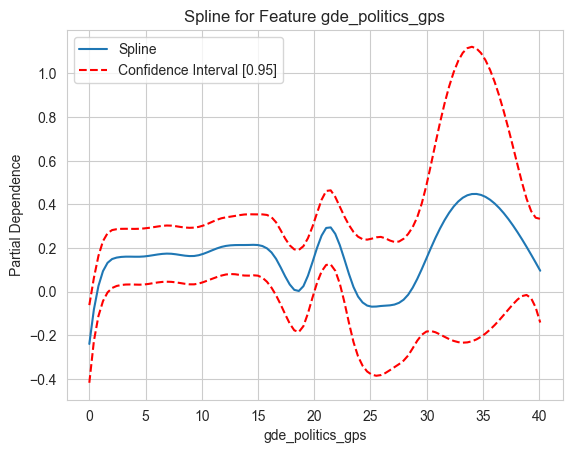

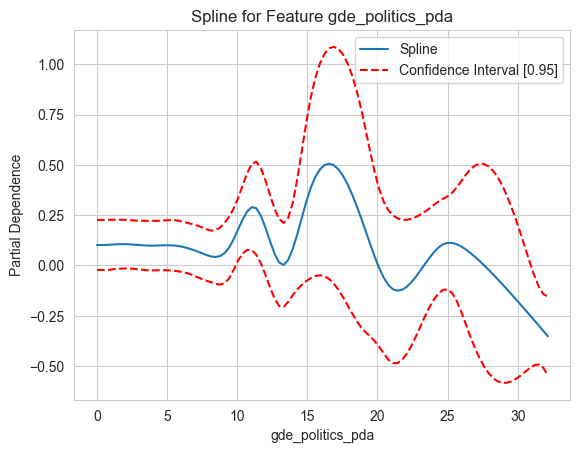

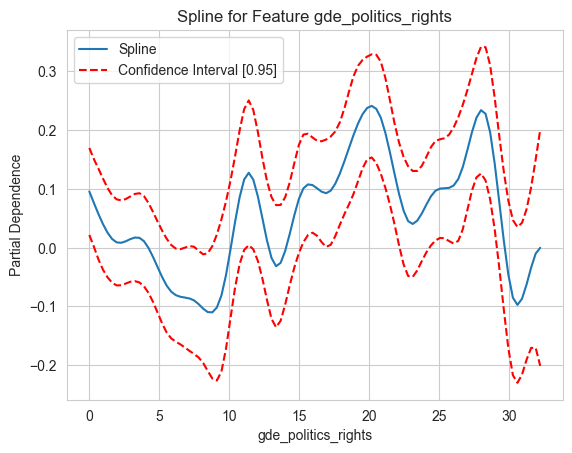

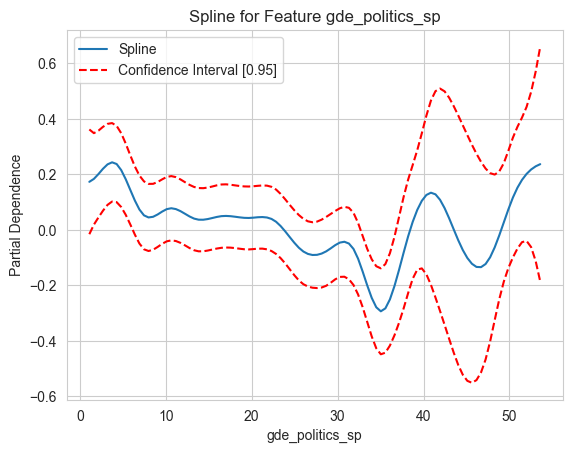

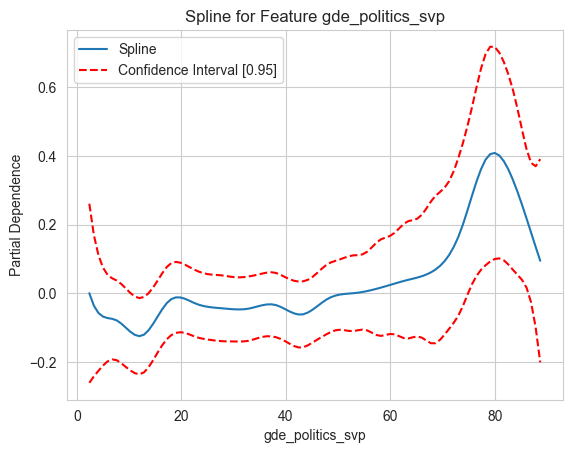

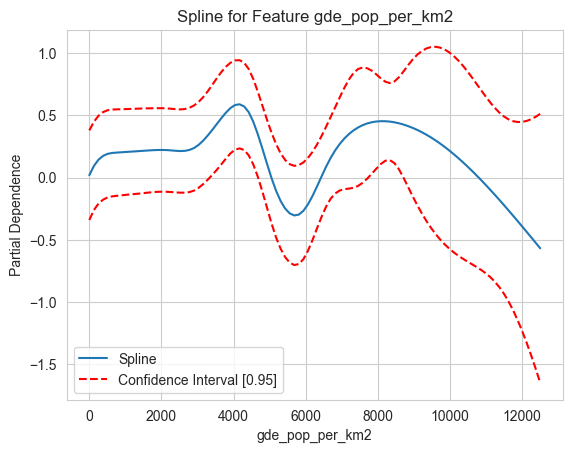

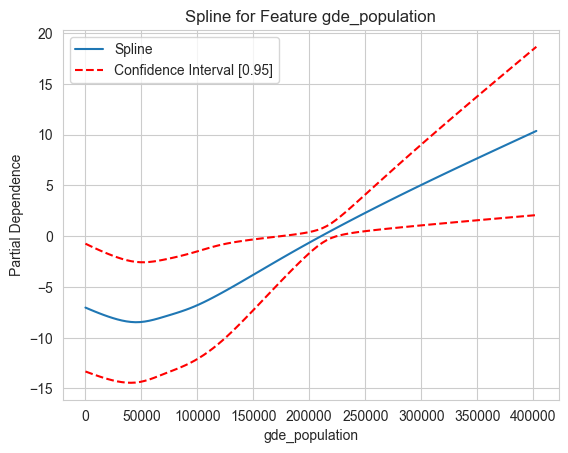

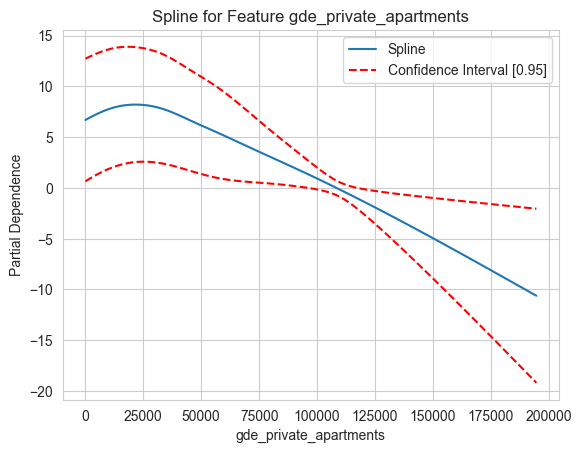

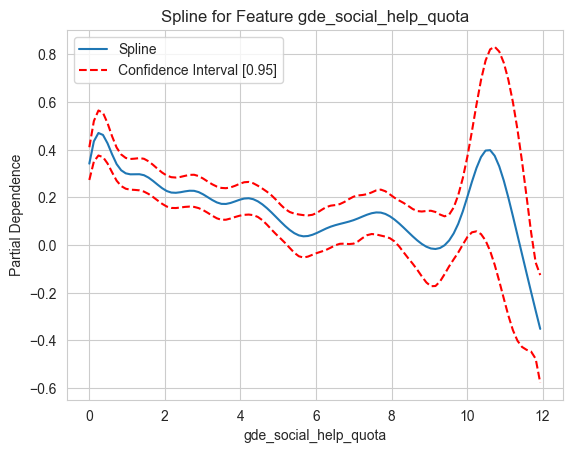

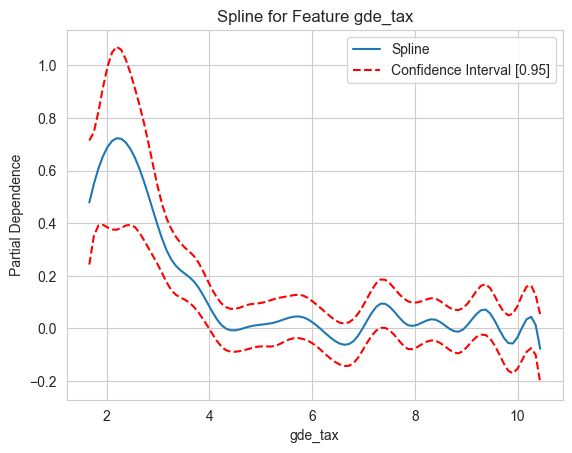

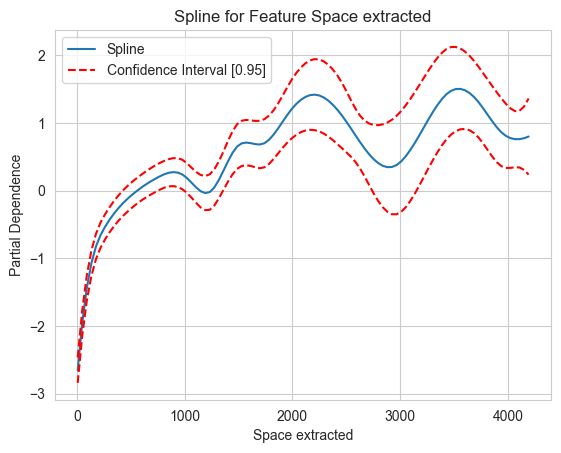

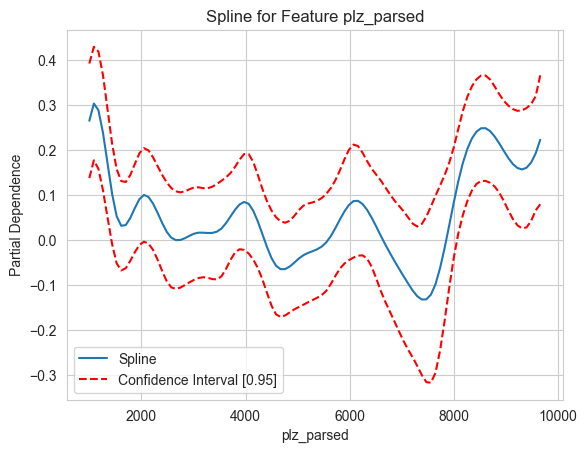

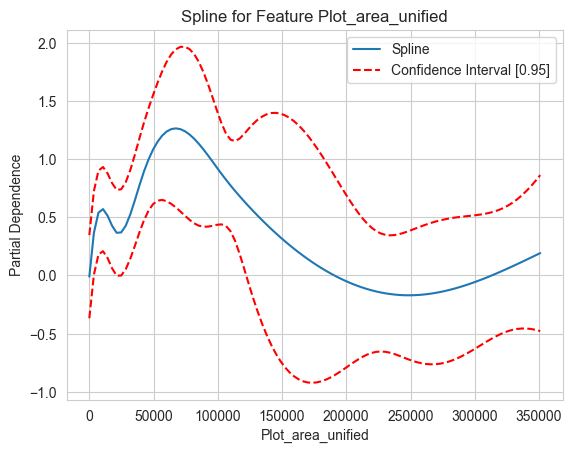

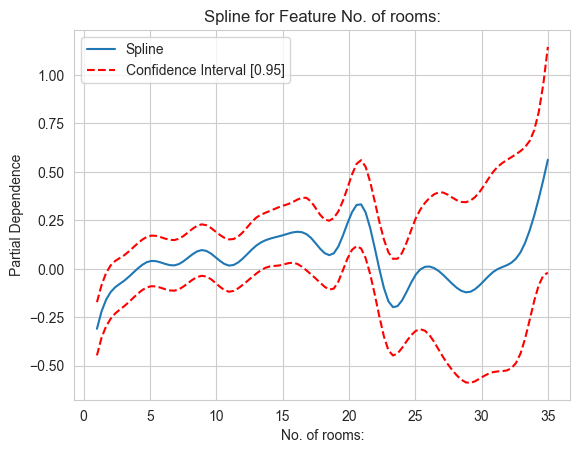

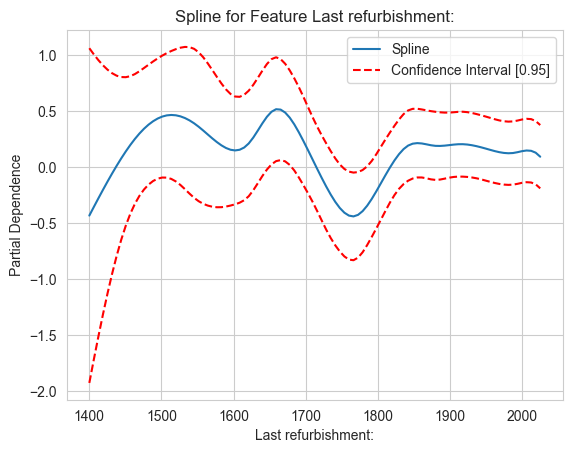

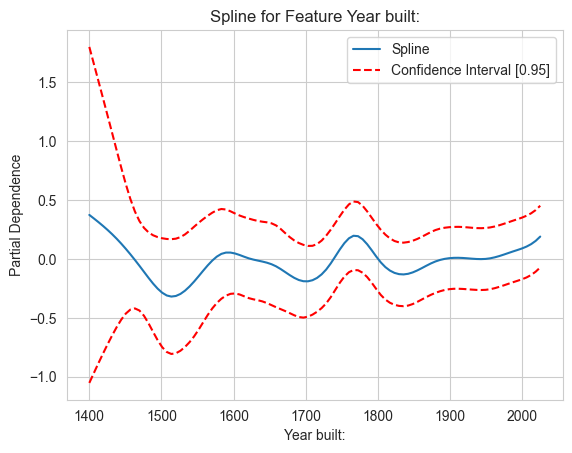

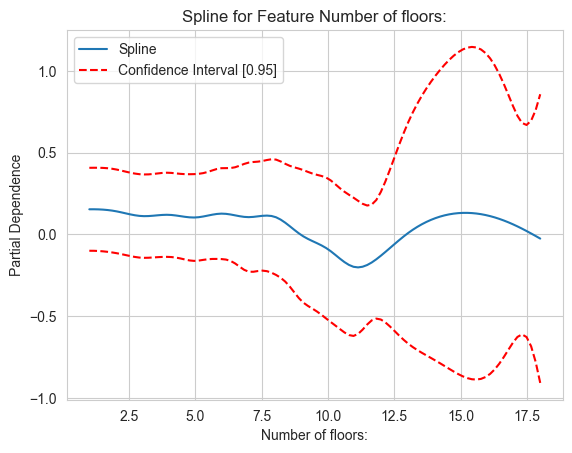

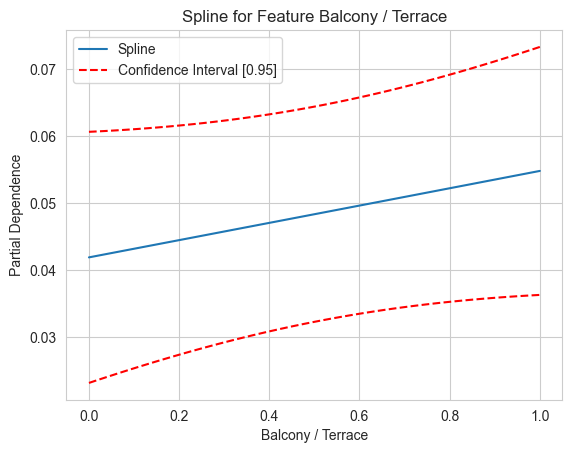

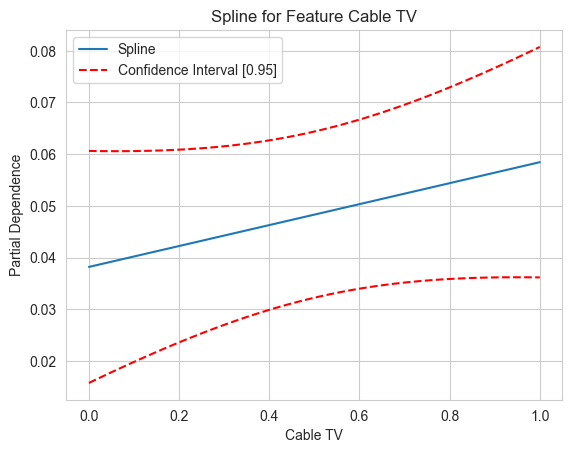

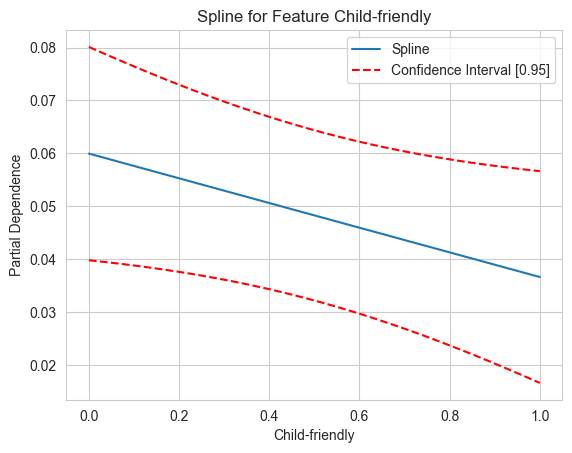

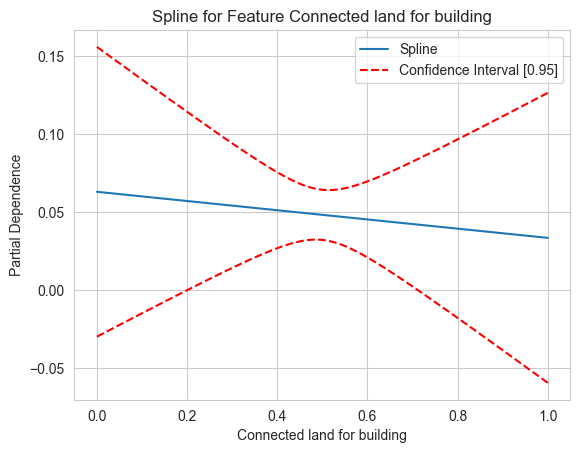

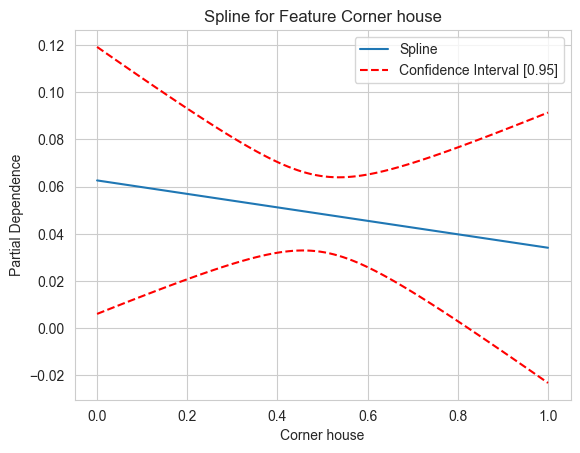

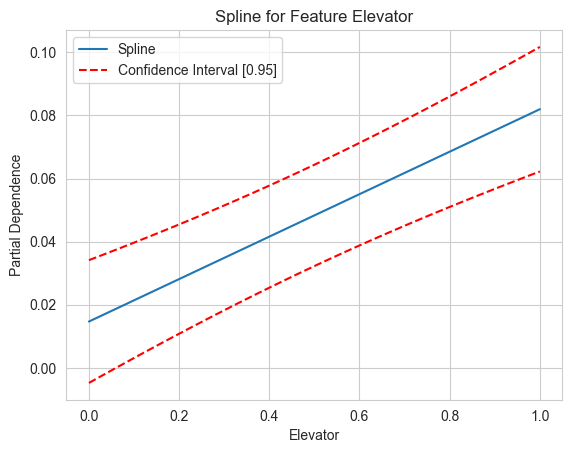

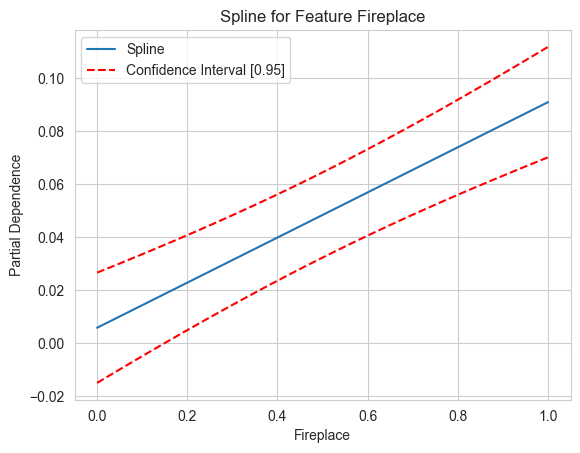

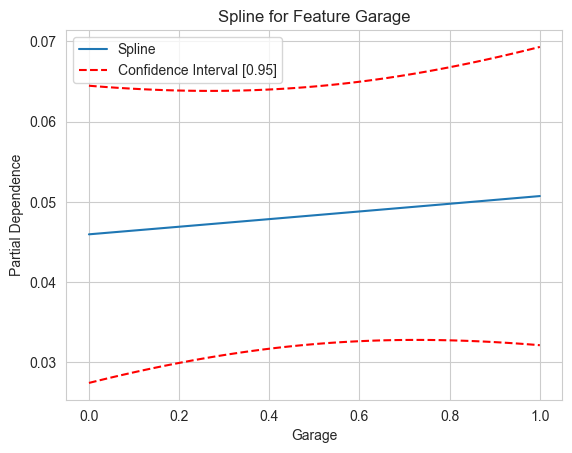

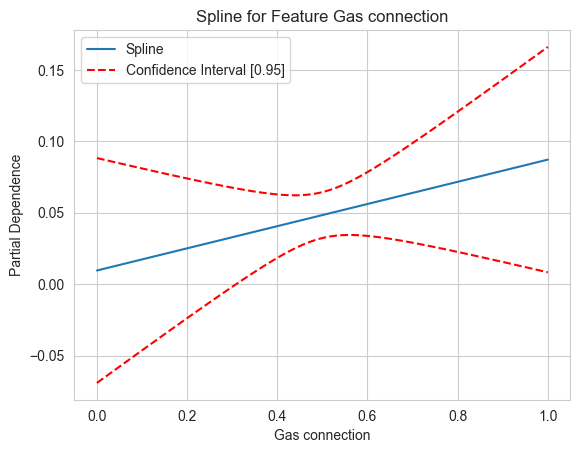

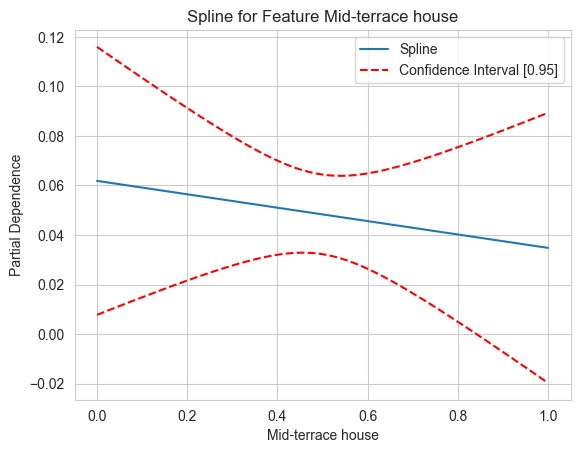

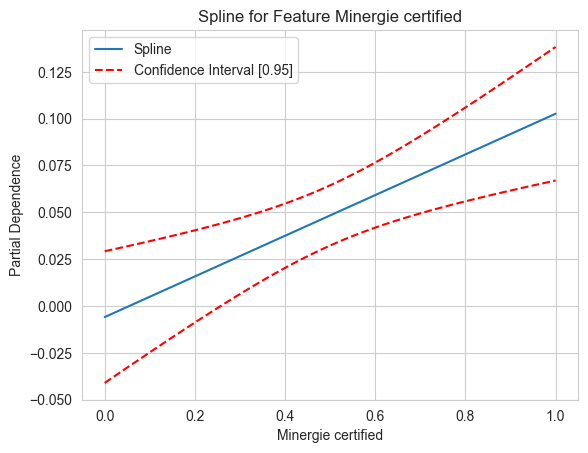

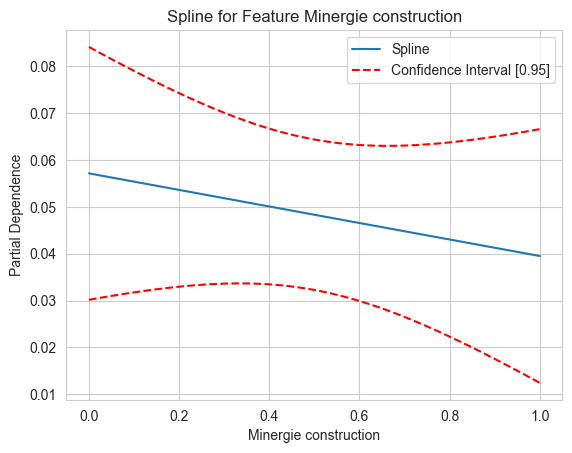

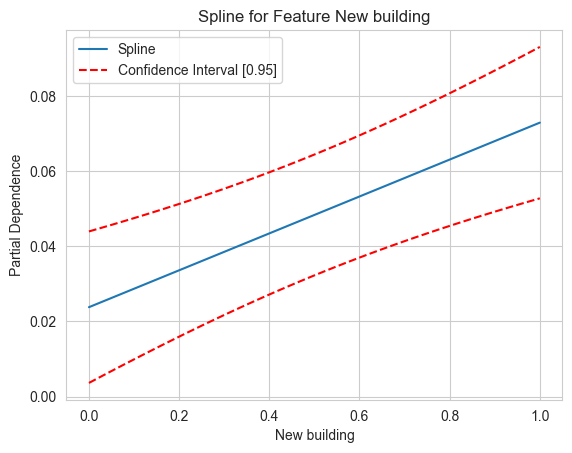

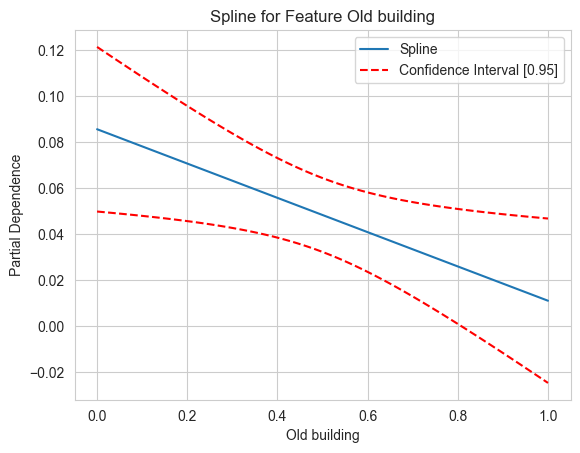

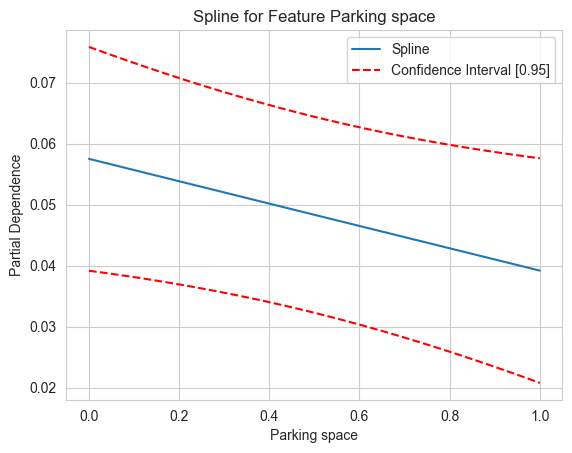

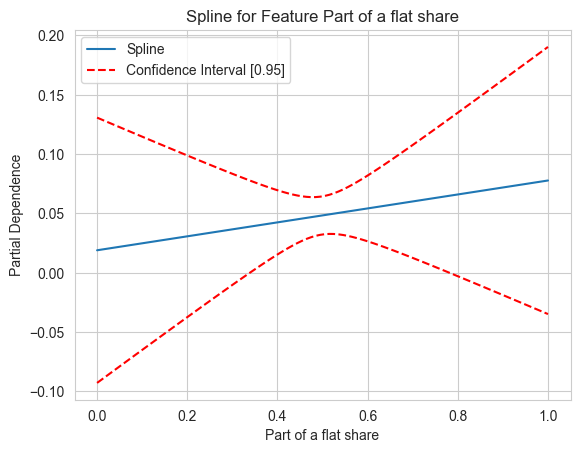

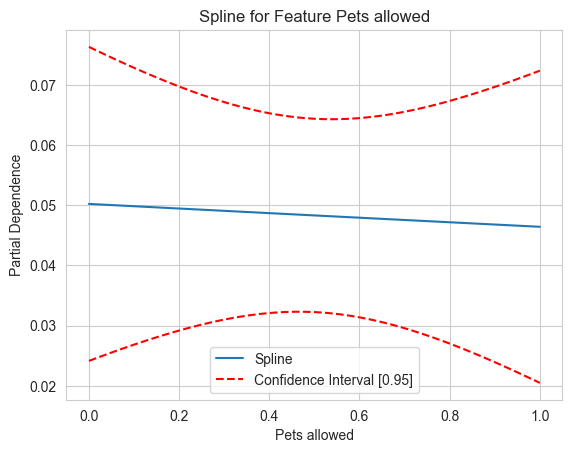

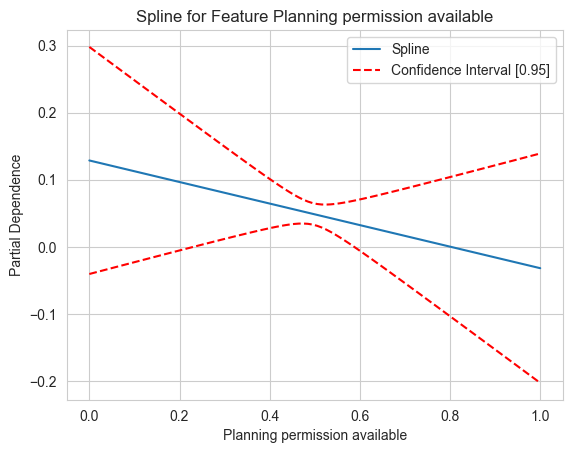

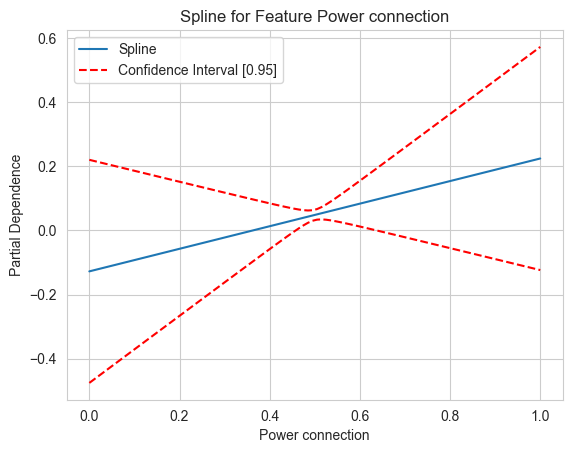

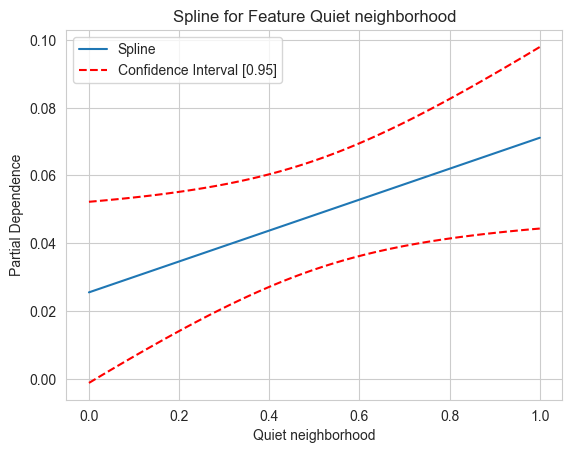

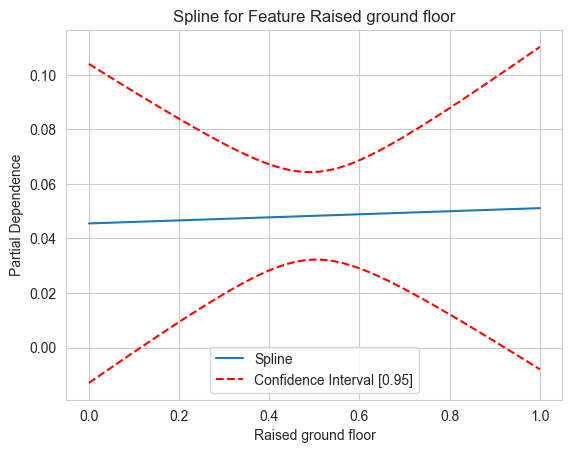

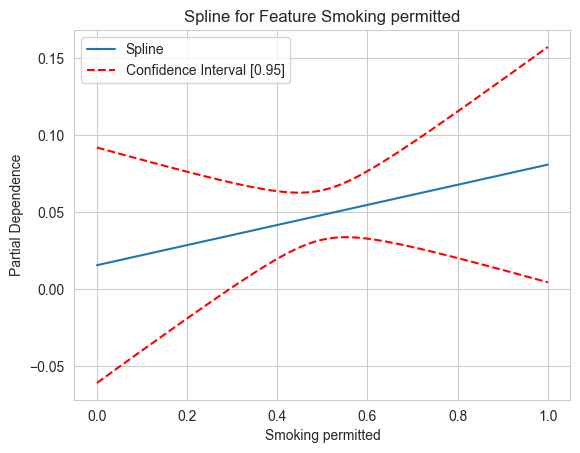

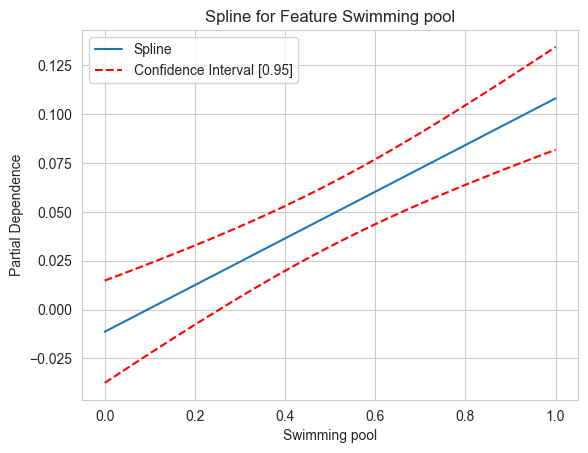

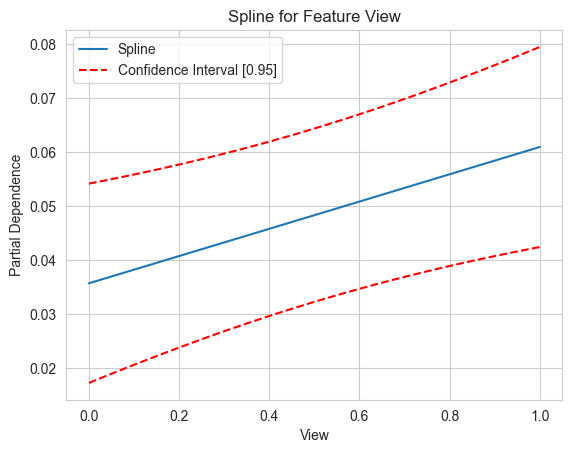

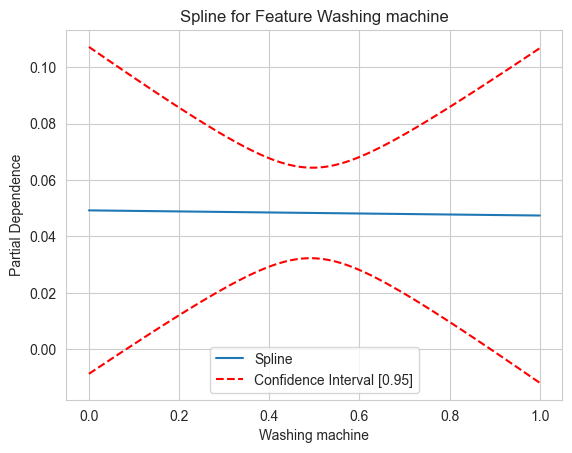

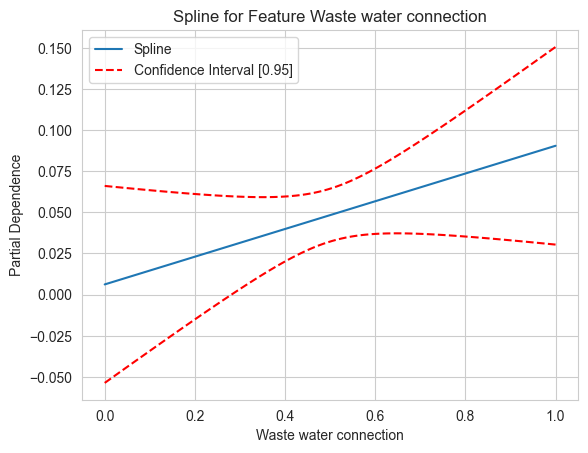

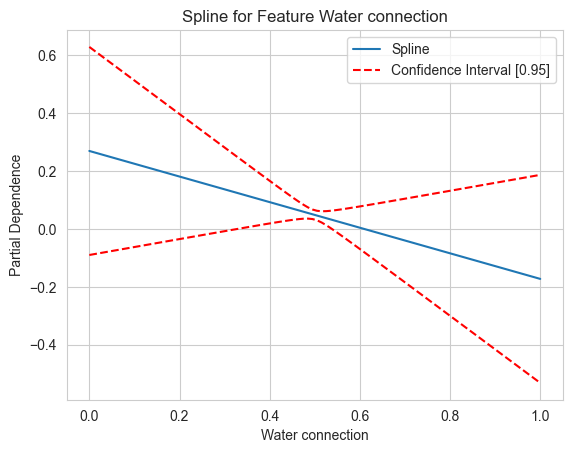

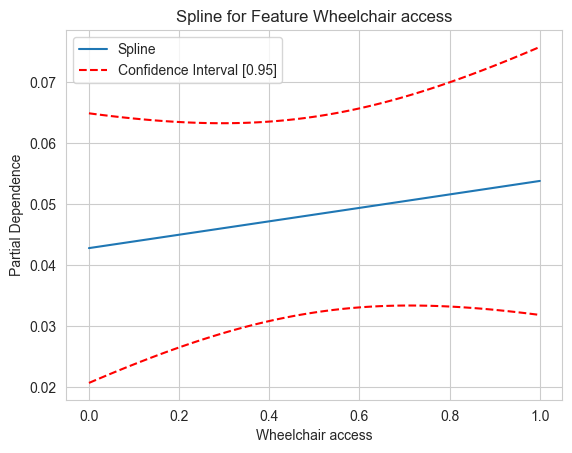

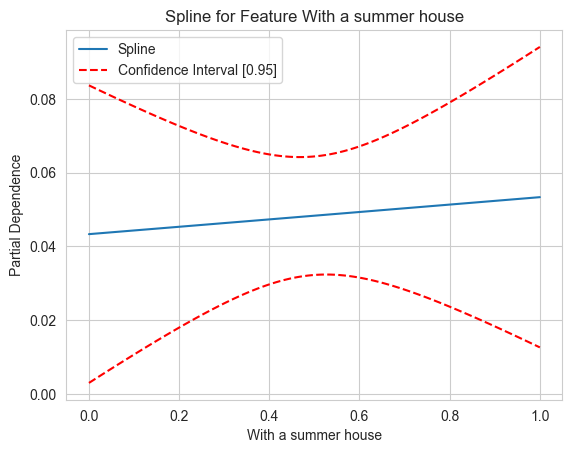

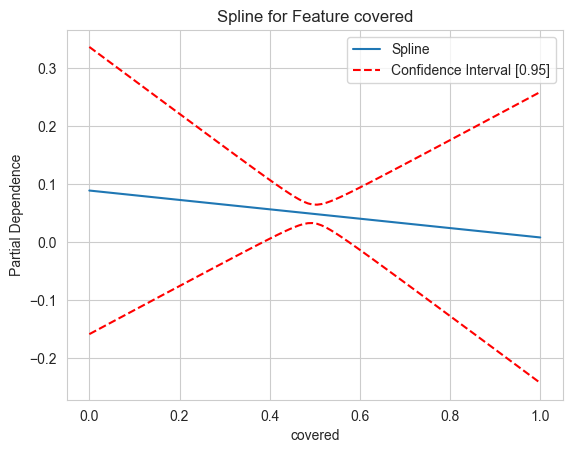

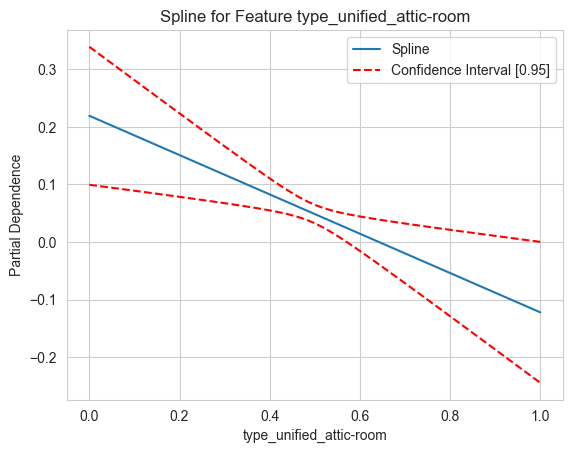

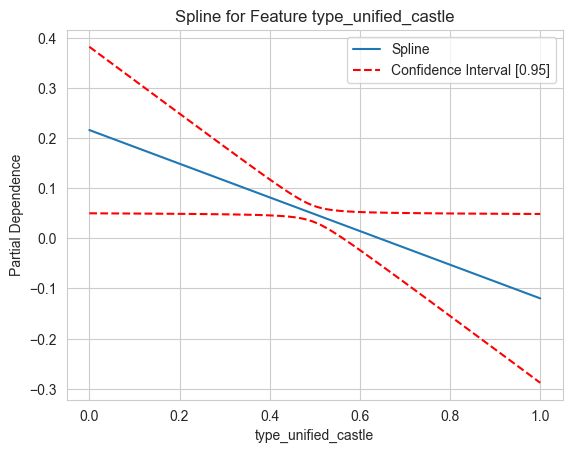

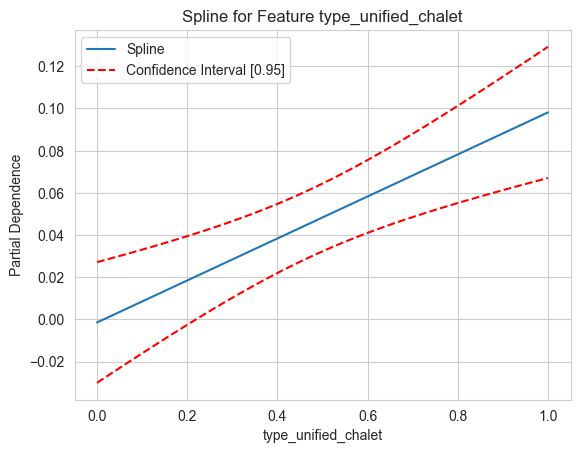

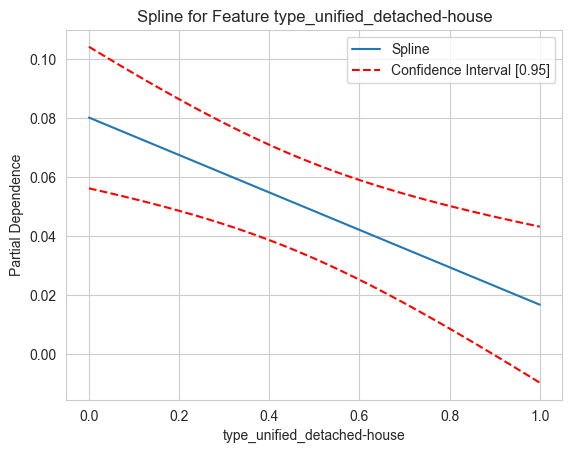

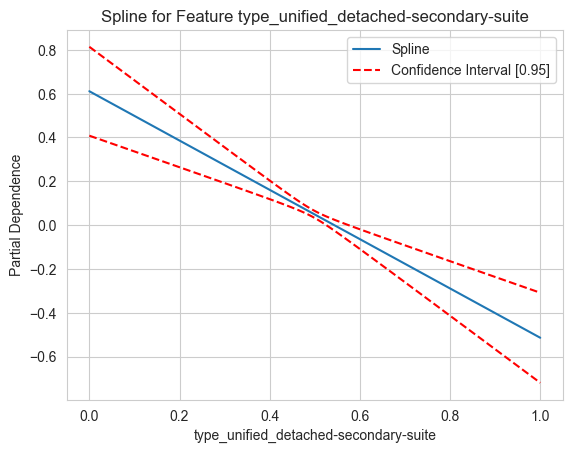

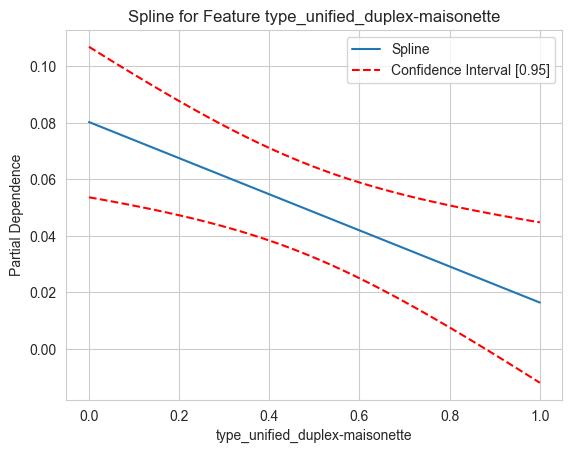

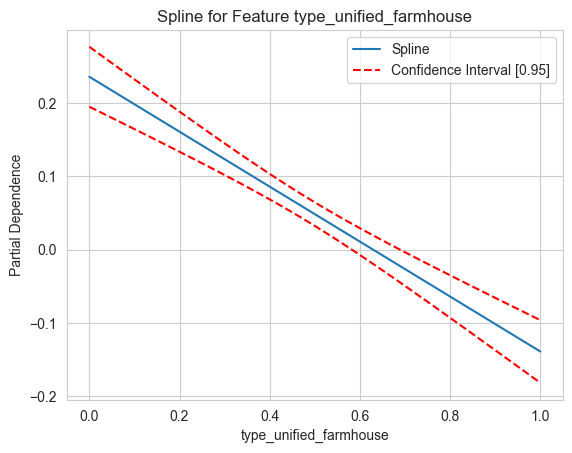

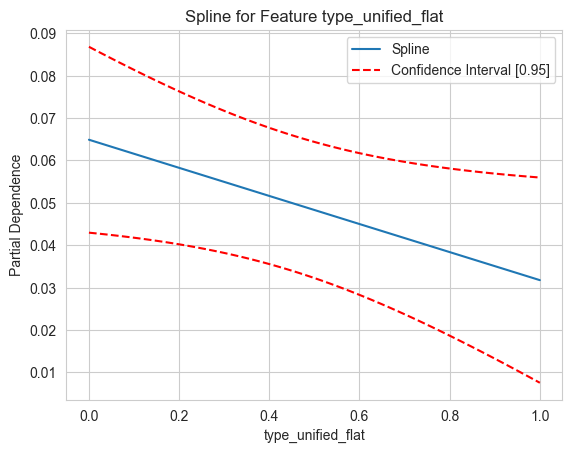

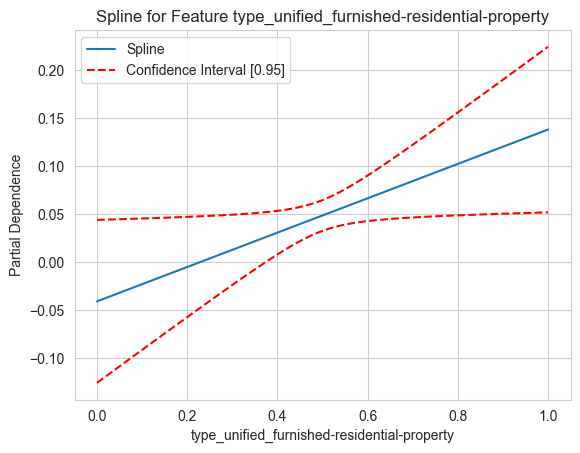

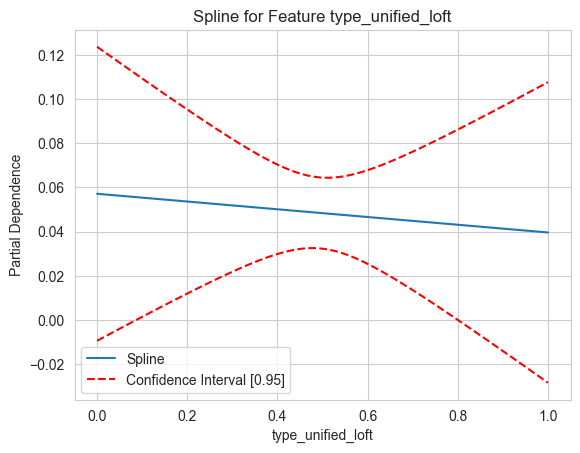

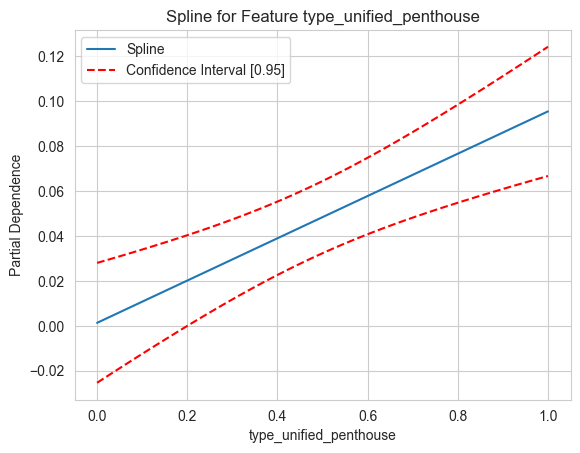

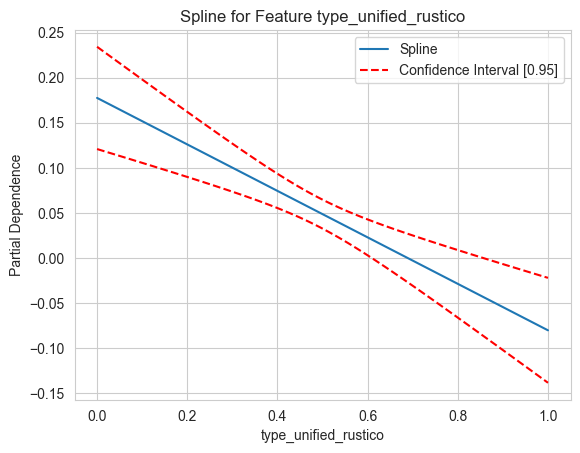

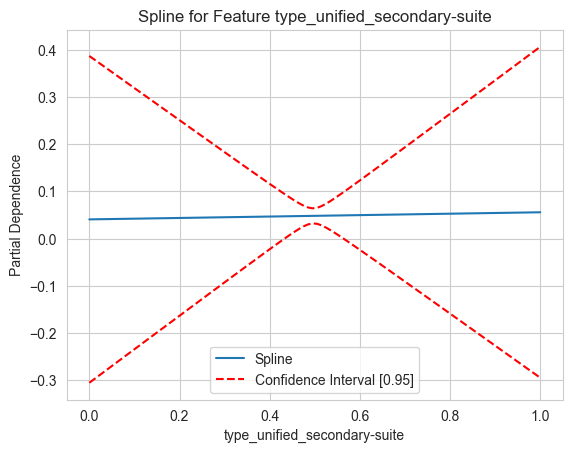

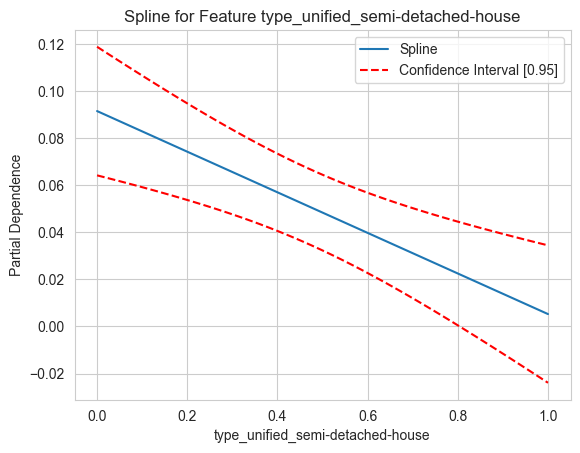

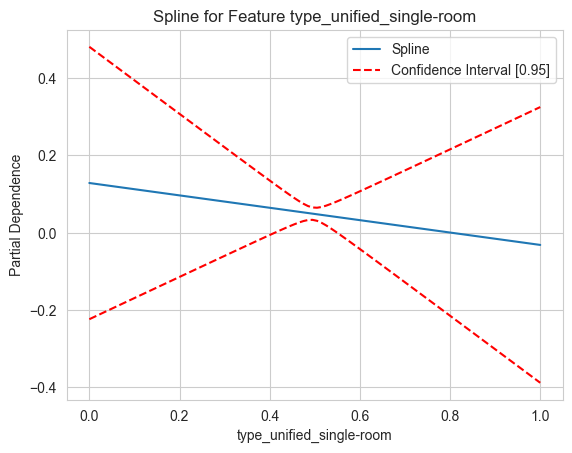

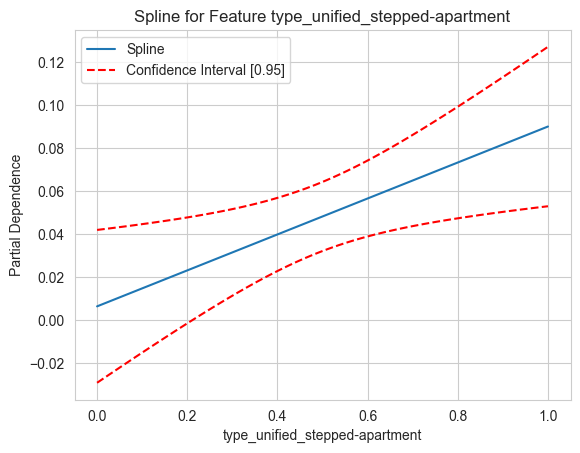

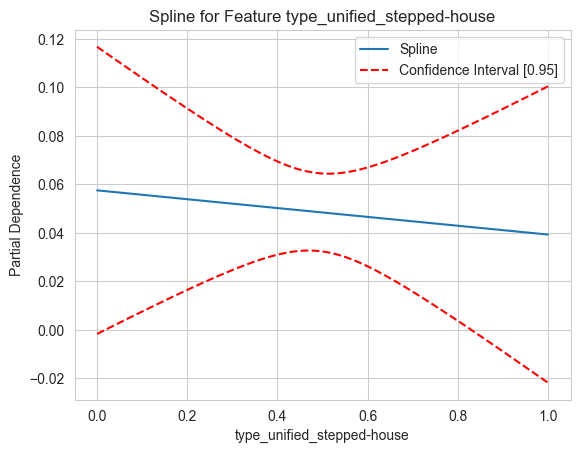

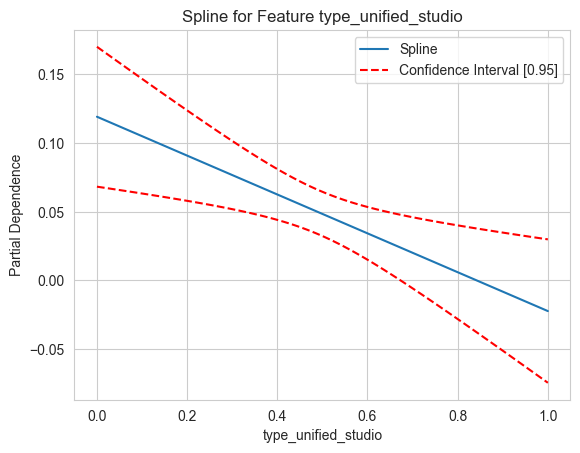

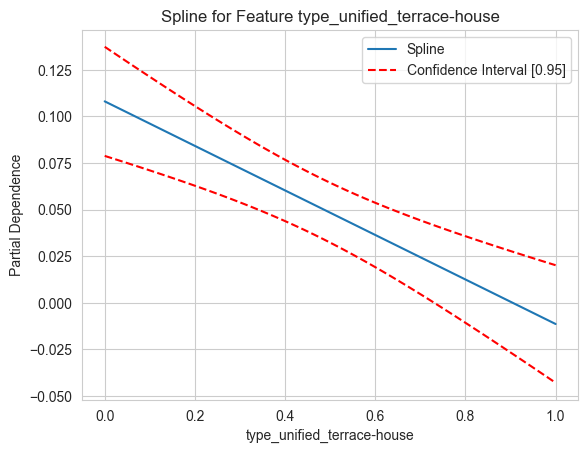

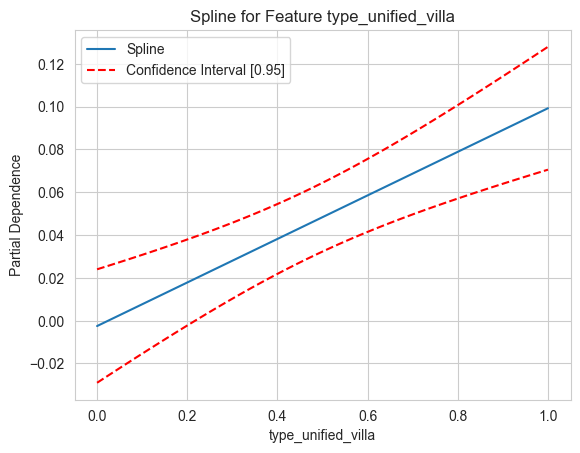

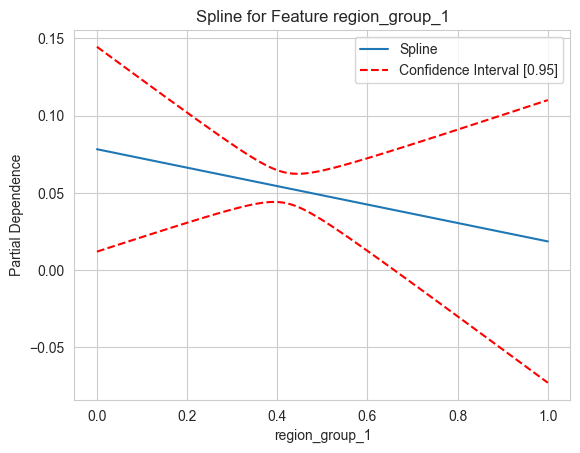

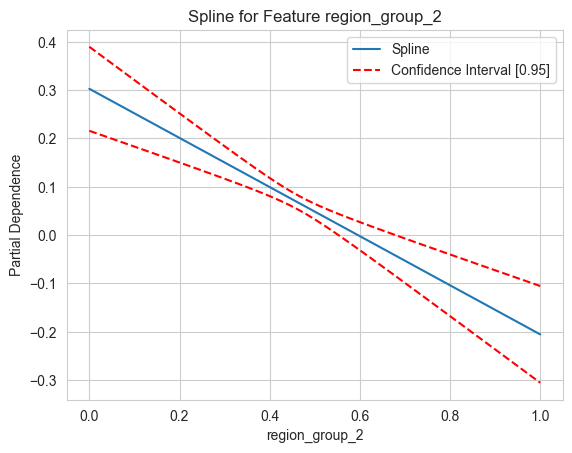

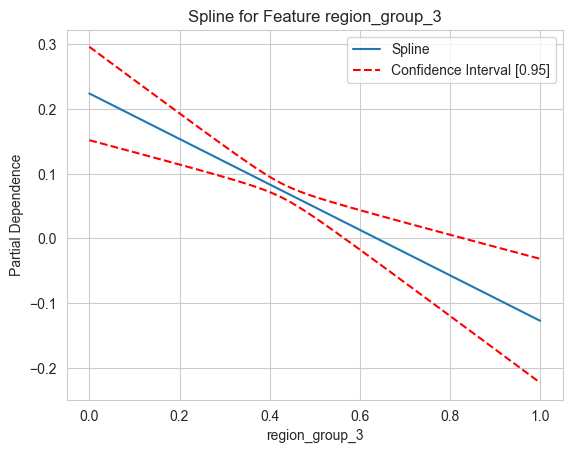

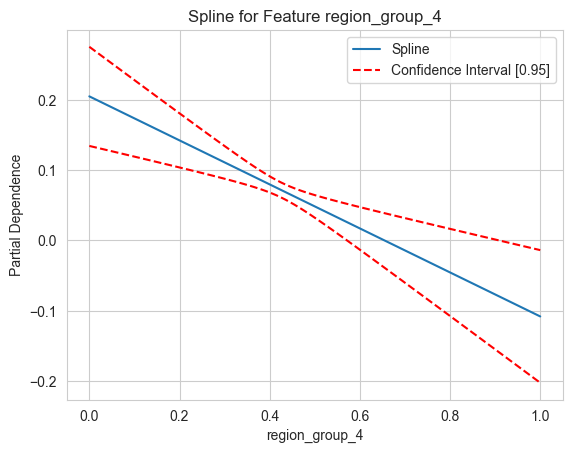

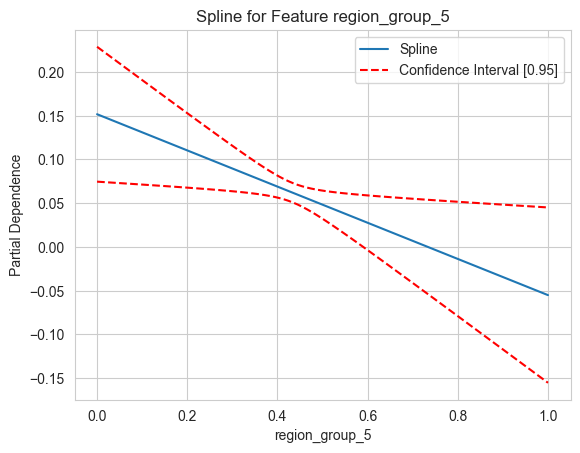

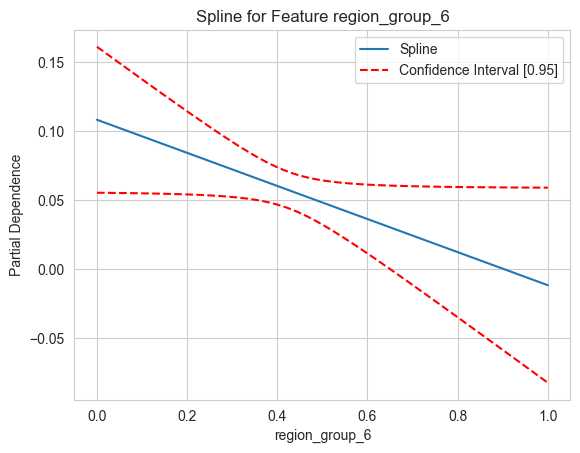

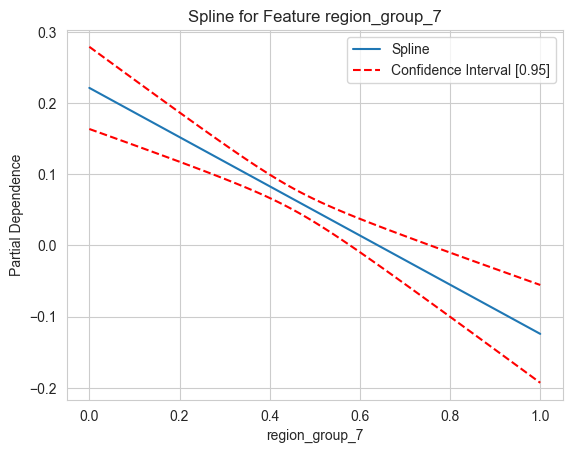

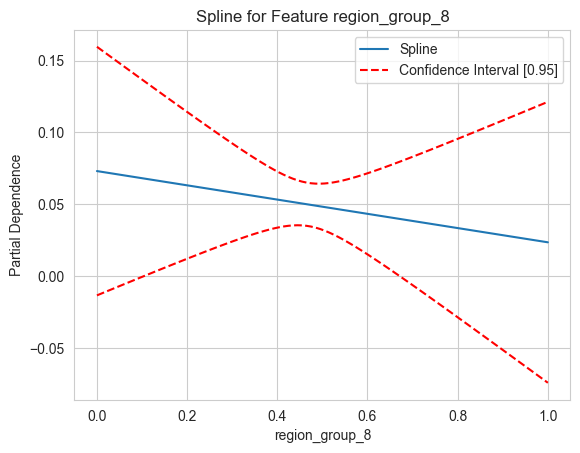

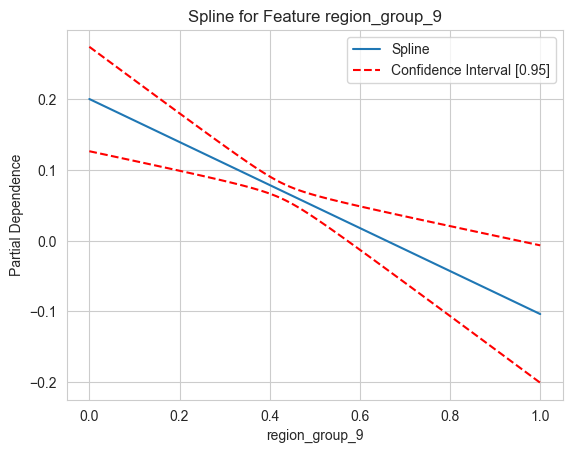

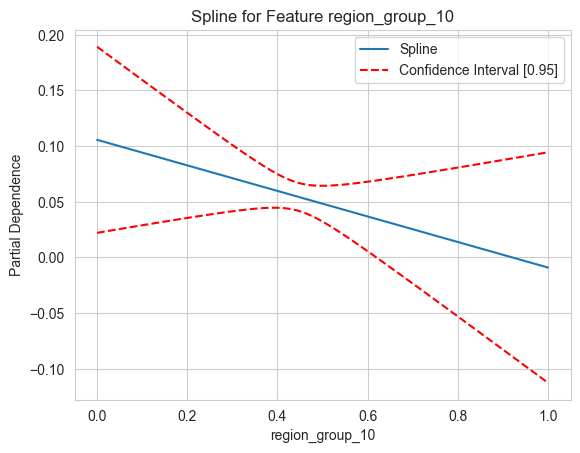

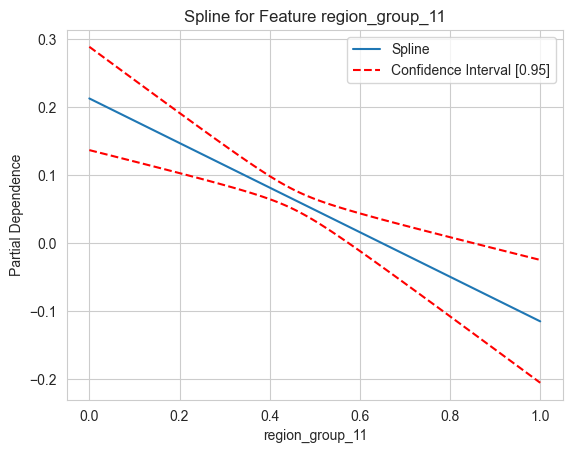

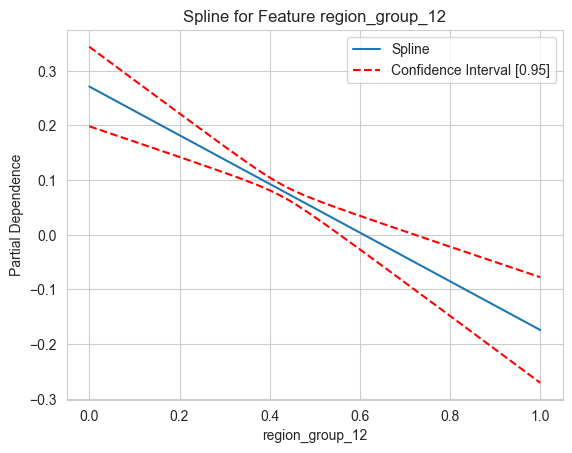

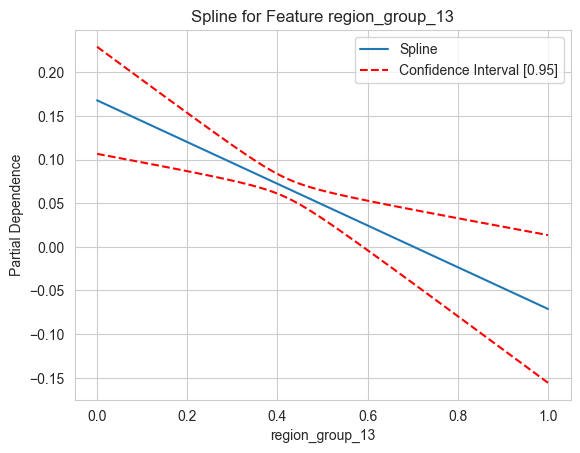

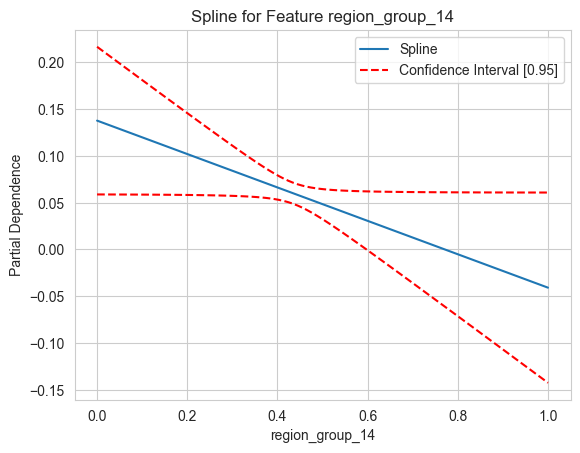

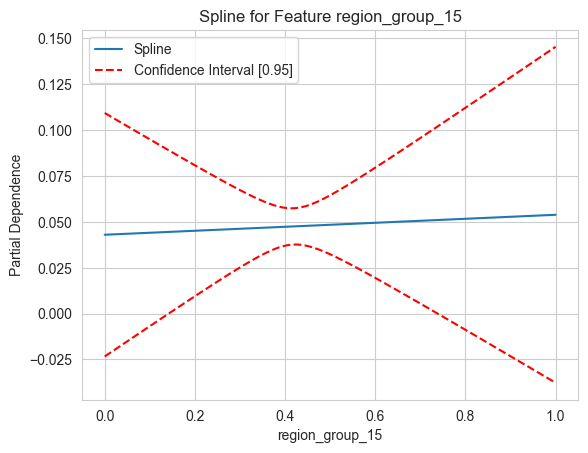

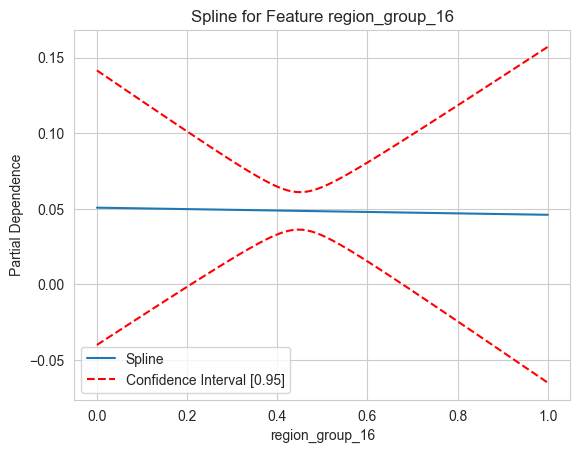

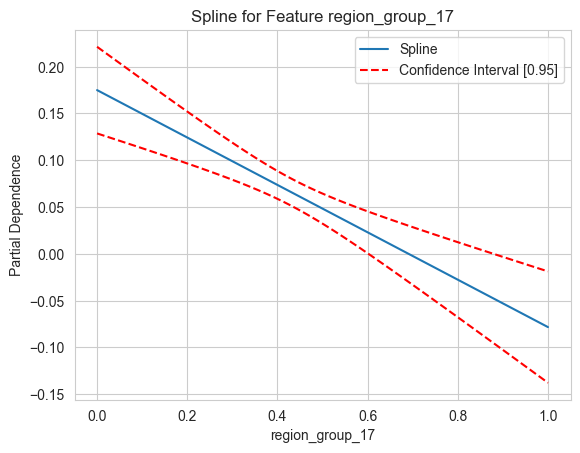

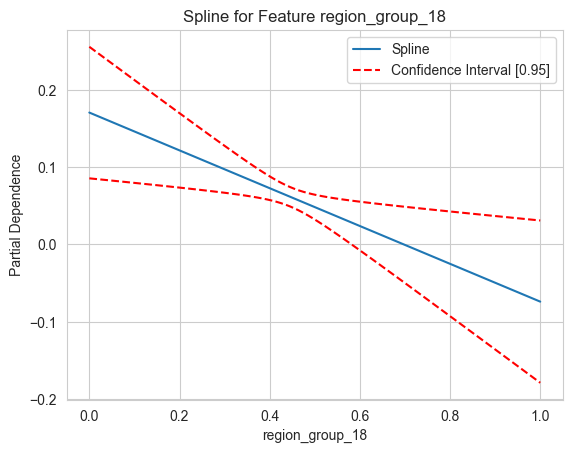

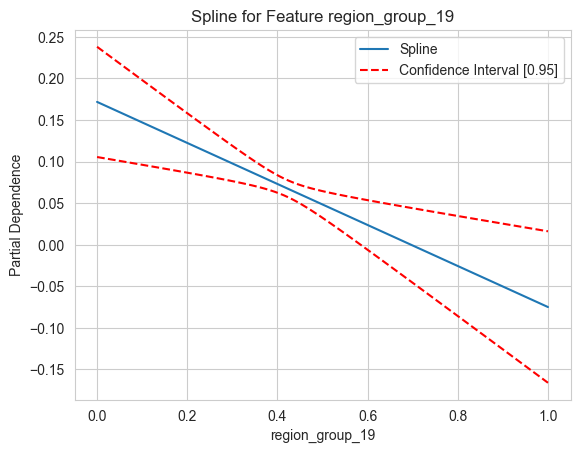

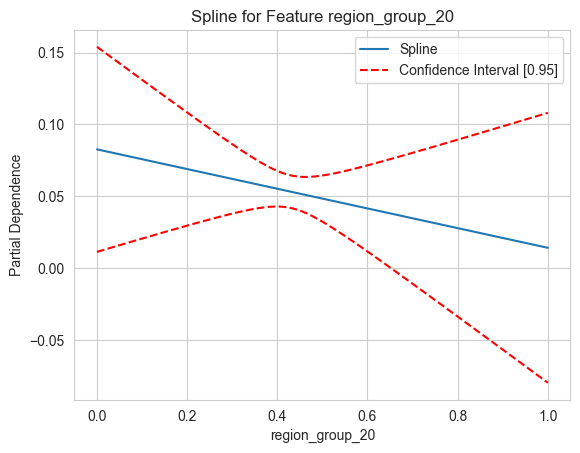

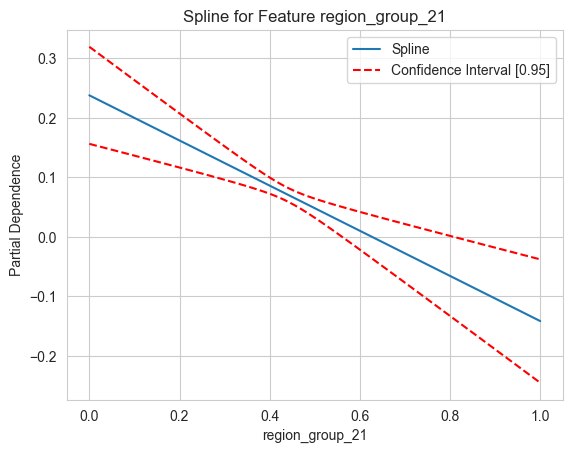

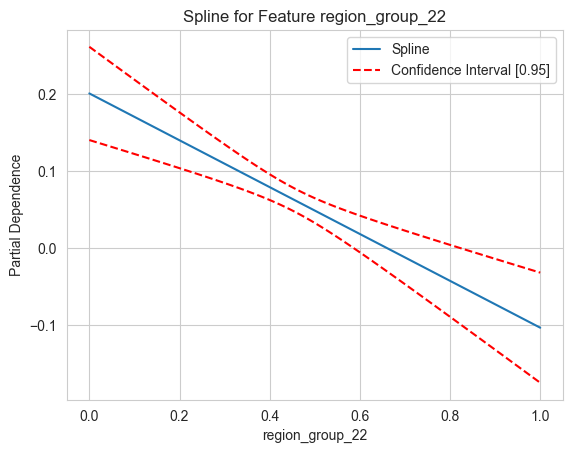

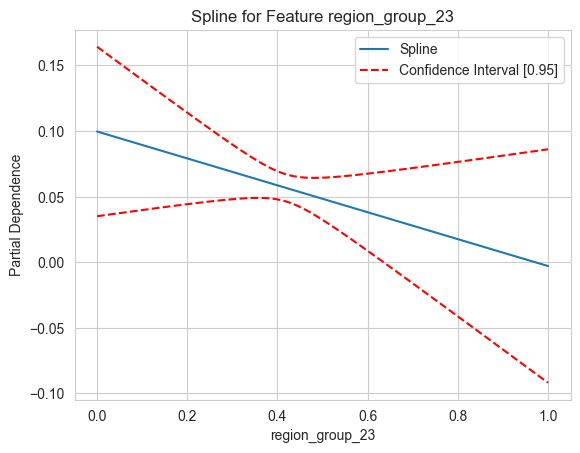

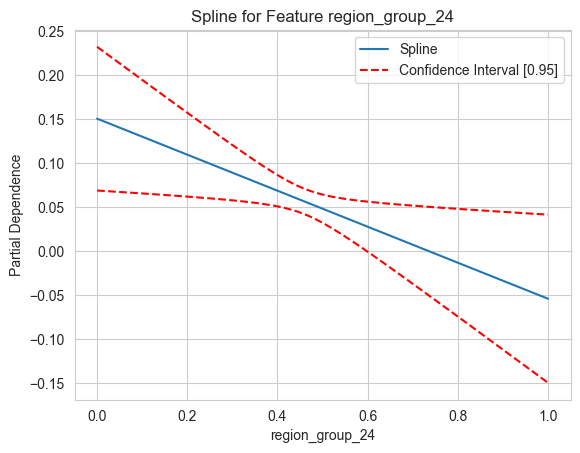

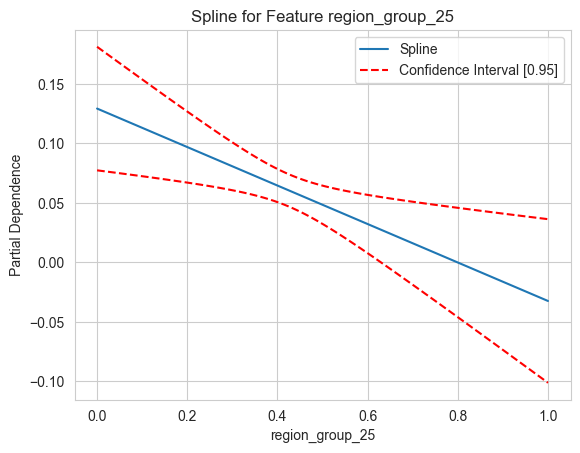

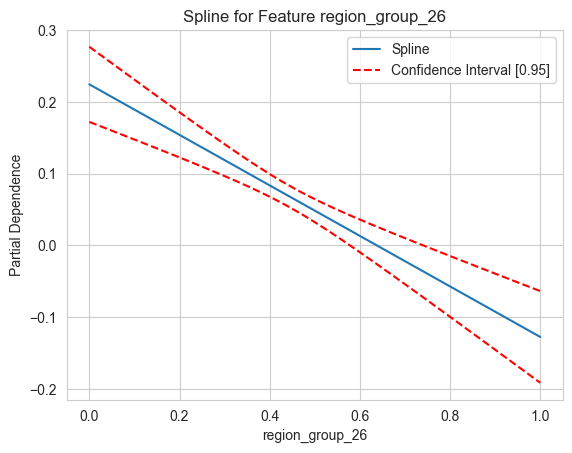

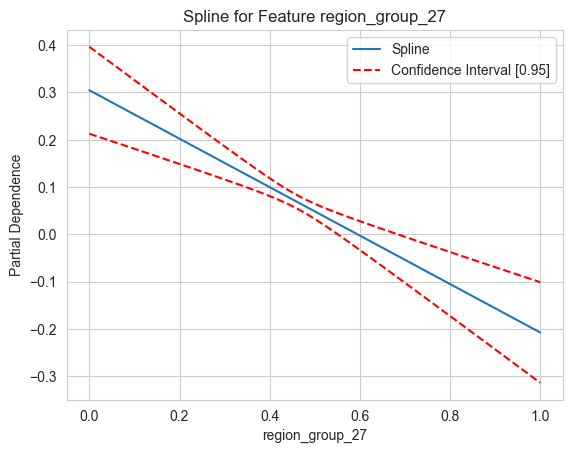

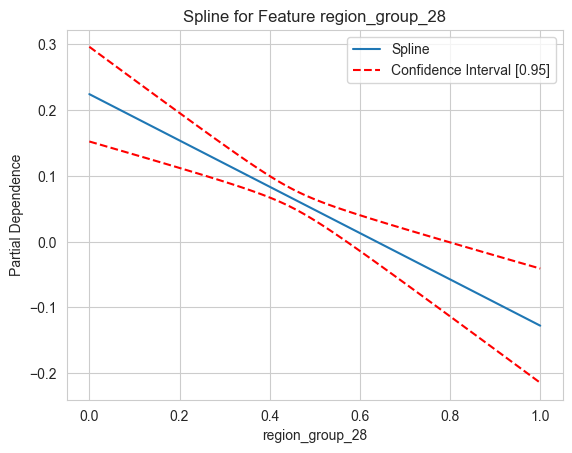

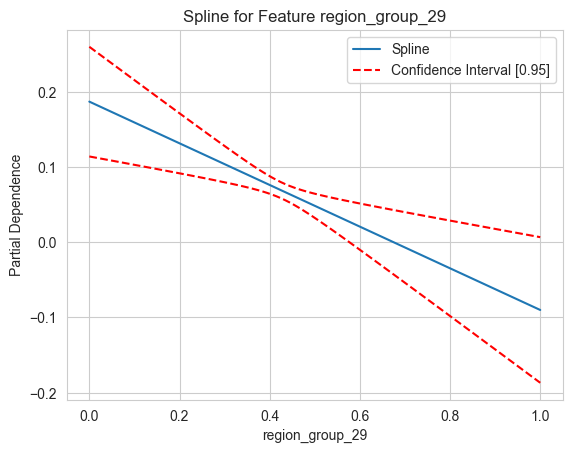

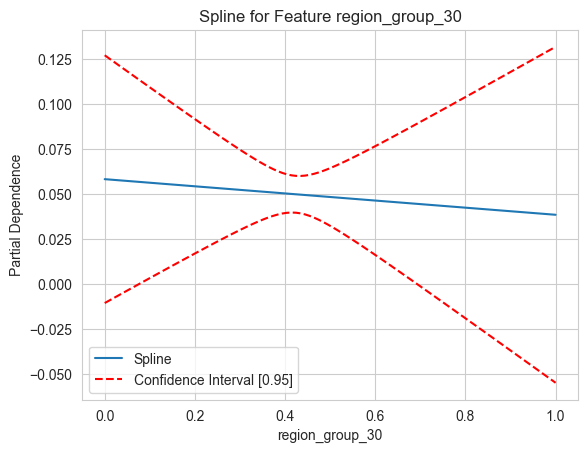

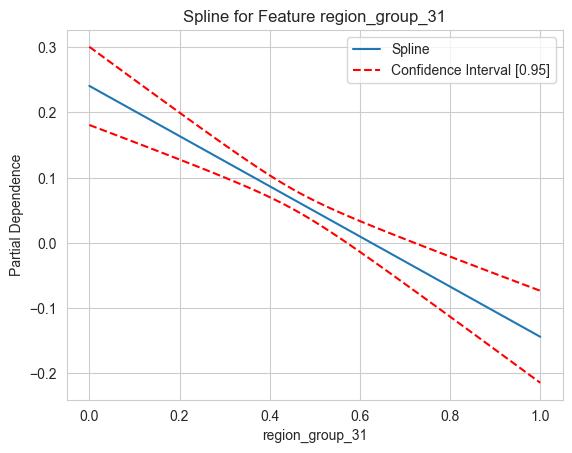

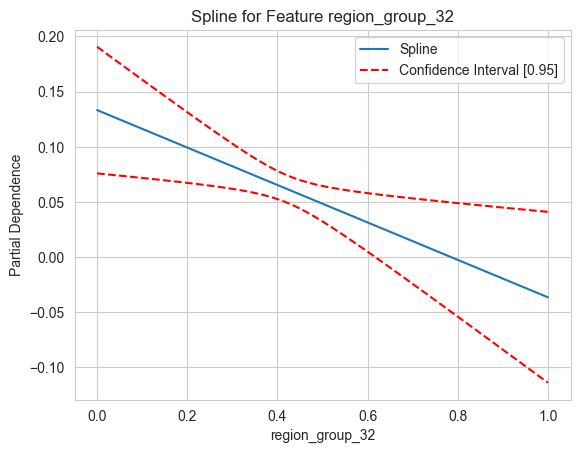

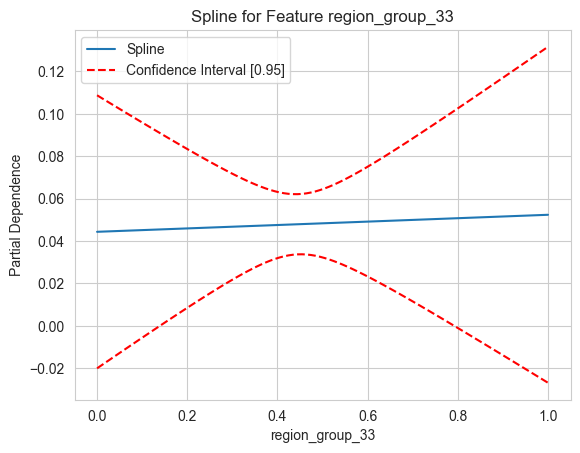

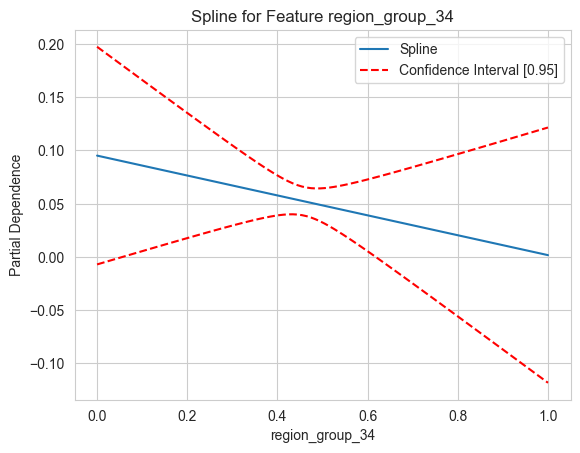

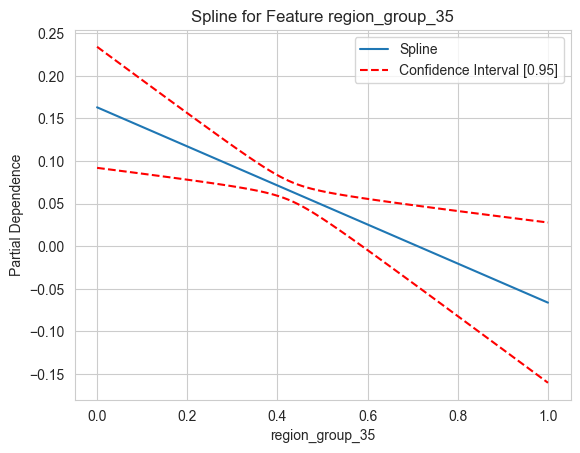

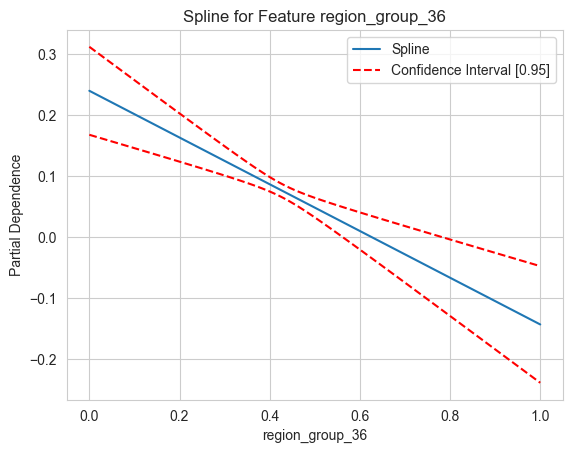

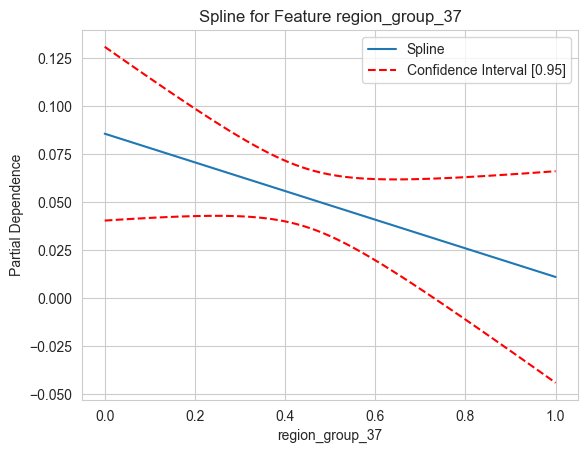

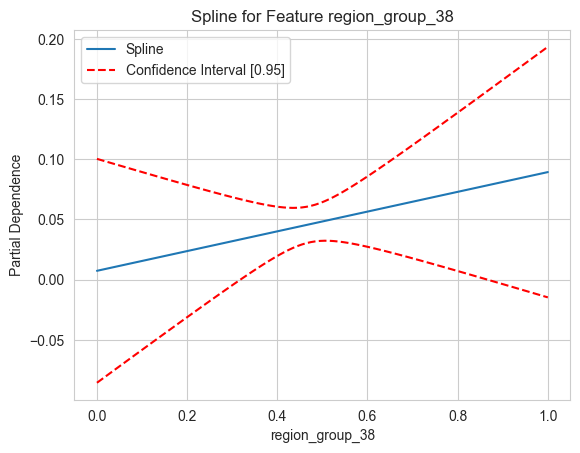

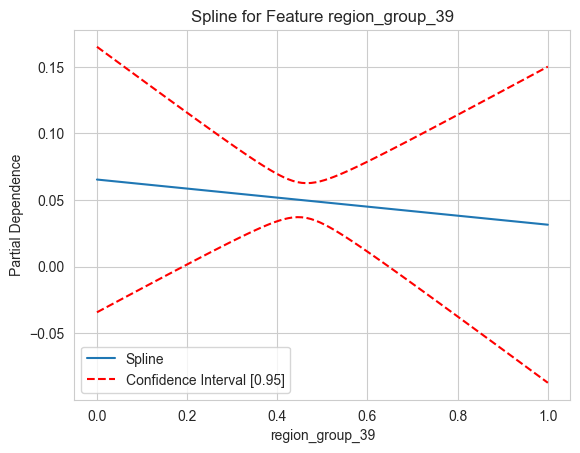

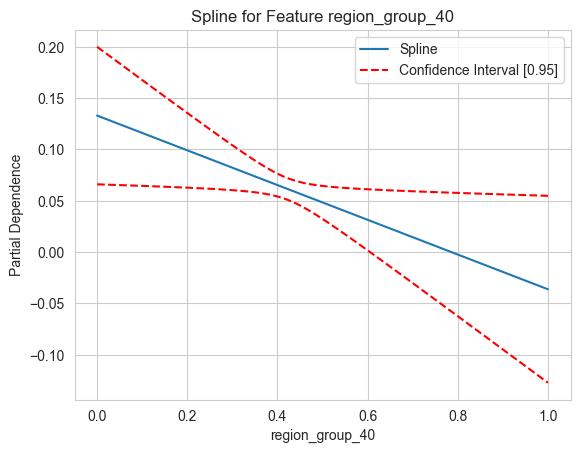

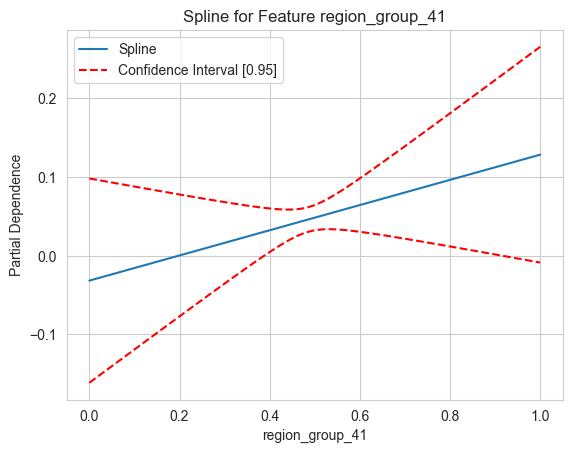

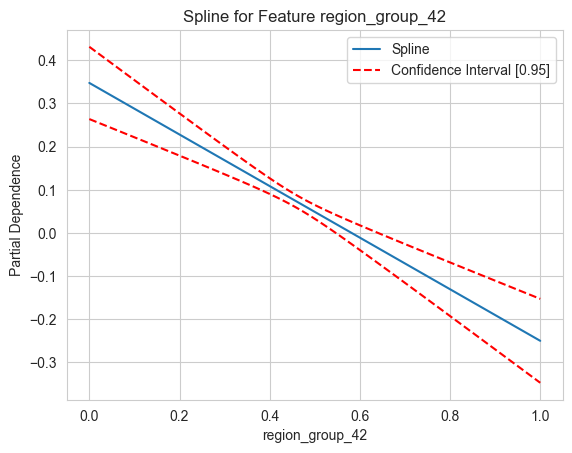

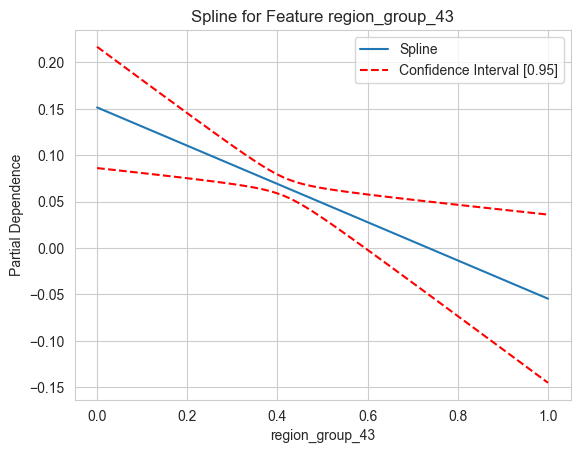

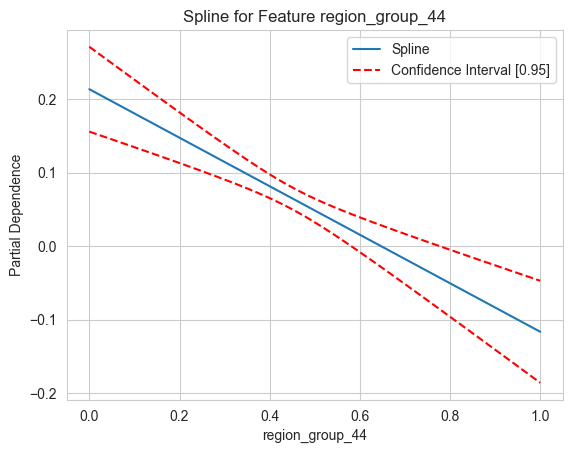

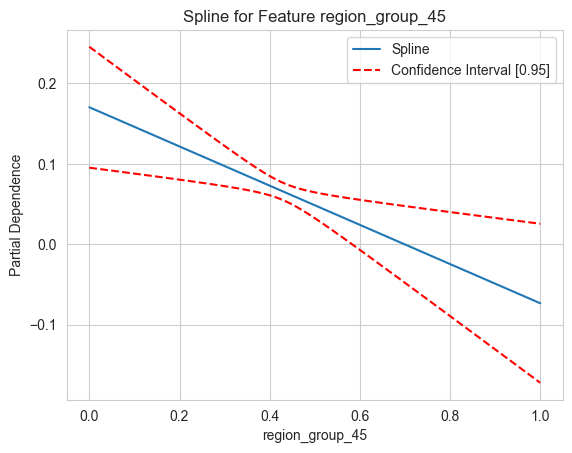

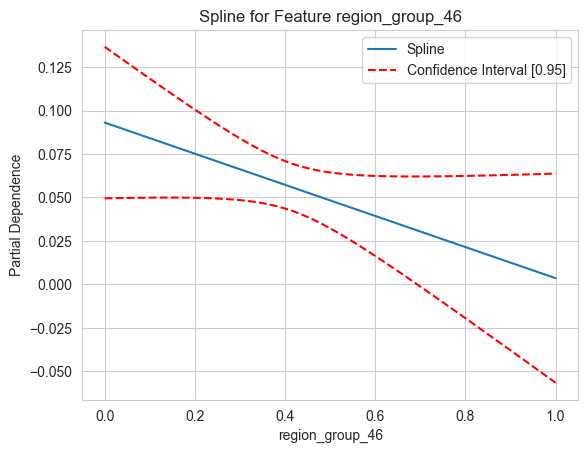

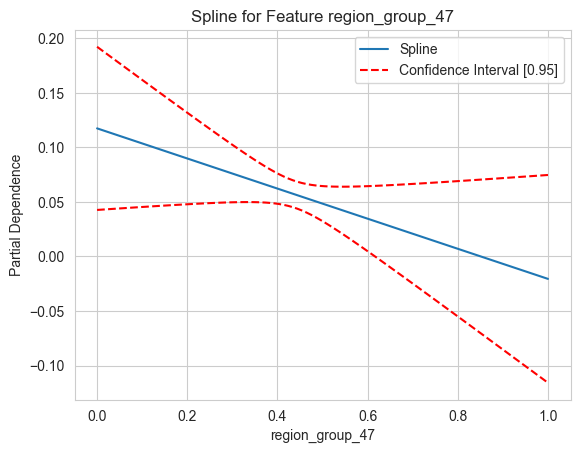

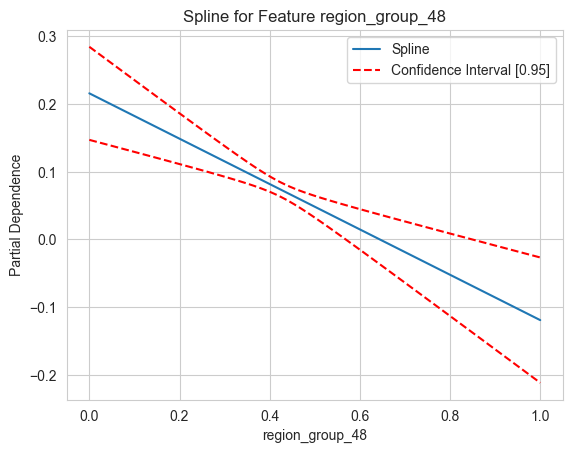

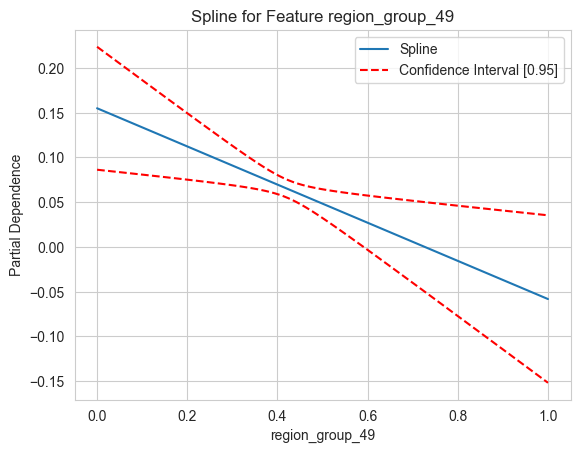

In [14]:
import matplotlib.pyplot as plt
feature_names = X_train.columns

for i, term in enumerate(model.terms):
    if term.isintercept:
        continue  # Skip intercept
    plt.figure()
    XX = model.generate_X_grid(term=i)
    original_X = dp.scaler.inverse_transform(XX)[:, i]
    
    pd = model.partial_dependence(term=i, X=XX)
    pd_confidence = model.partial_dependence(term=i, X=XX, width=.95)[1]
    
    plt.plot(original_X, pd, label='Spline')
    plt.plot(original_X, pd_confidence, c='r', ls='--', label='Confidence Interval')
    plt.title(f'Spline for Feature {feature_names[i]}')
    plt.xlabel(f'{feature_names[i]}')
    plt.ylabel('Partial Dependence')
    plt.legend(['Spline', 'Confidence Interval [0.95]'])
    plt.show()


## Fehleranalysen
Die Liste der höchsten Fehler ist hier dargestellt. Die Fehler sind in absoluten Zahlen und in Prozent angegeben.

In [8]:
from src.utils.helperFunctions import analyse_highest_errors

y_pred = np.exp(model.predict(X_test_np))

error_df_test = analyse_highest_errors(y_test, y_pred, X_test, dp)
error_df_test

Floor  ForestDensityL  ForestDensityM  ForestDensityS  \
2198   0.00            0.21            0.11            0.07   
2229   1.00            0.00            0.00            0.00   
1349   0.00            0.10            0.18            0.31   
1914   0.00            0.16            0.08            0.00   
2828   0.00            0.00            0.00            0.00   
...     ...             ...             ...             ...   
4148   1.00            0.10            0.01            0.00   
4149   2.00            0.00            0.00            0.00   
4151   0.00            0.47            0.35            0.10   
4152   3.00            0.56            0.17            0.20   
4155   0.00            0.18            0.04            0.00   

      NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
2198                    0.00                    0.00                    0.00   
2229                    0.04                    0.00                    0.00   
1349                    0.00                    0.00                    0.00   
1914                    0.00                    0.00                    0.00   
2828                    0.02                    0.05                    0.02   
...                      ...                     ...                     ...   
4148                    0.03                    0.03                    0.00   
4149                    0.05                    0.08                    0.04   
4151                    0.00                    0.00                    0.00   
4152                    0.02                    0.04                    0.14   
4155                    0.00                    0.00                    0.00   

      NoisePollutionRoadL  NoisePollutionRoadM  NoisePollutionRoadS  ...  \
2198                 0.21                 0.18                 0.12  ...   
2229                 0.31                 0.34                 0.33  ...   
1349                 0.12                 0.17                 0.18  ...   
1914                 0.22                 0.23                 0.28  ...   
2828                 0.38                 0.42                 0.38  ...   
...                   ...                  ...                  ...  ...   
4148                 0.35                 0.34                 0.42  ...   
4149                 0.29                 0.36                 0.32  ...   
4151                 0.05                 0.02                 0.03  ...   
4152                 0.23                 0.24                 0.29  ...   
4155                 0.04                 0.05                 0.00  ...   

      region_group_44  region_group_45  region_group_46  region_group_47  \
2198             0.00             0.00            -0.00             0.00   
2229             0.00             0.00            -0.00             0.00   
1349             0.00             0.00            -0.00             0.00   
1914             0.00             0.00            -0.00             0.00   
2828             0.00             0.00            -0.00             0.00   
...               ...              ...              ...              ...   
4148             0.00             0.00            -0.00             0.00   
4149             0.00             0.00            -0.00             0.00   
4151             0.00             0.00            -0.00             0.00   
4152             0.00             0.00            -0.00             0.00   
4155             0.00             0.00            -0.00             0.00   

      region_group_48  region_group_49  true_price  predicted_price  \
2198             0.00             0.00   258000.00       6388354.18   
2229             0.00             0.00    44000.00        958818.63   
1349             0.00             0.00   298000.00       4982260.82   
1914             0.00             0.00   195000.00       3215791.26   
2828             0.00             0.00   430000.00       6424813.26   
...               ...              .

Die höchsten Fehler sind bei Immobilien mit sehr kleinen Preisen. Dies liegt an der Metrik MAPE.

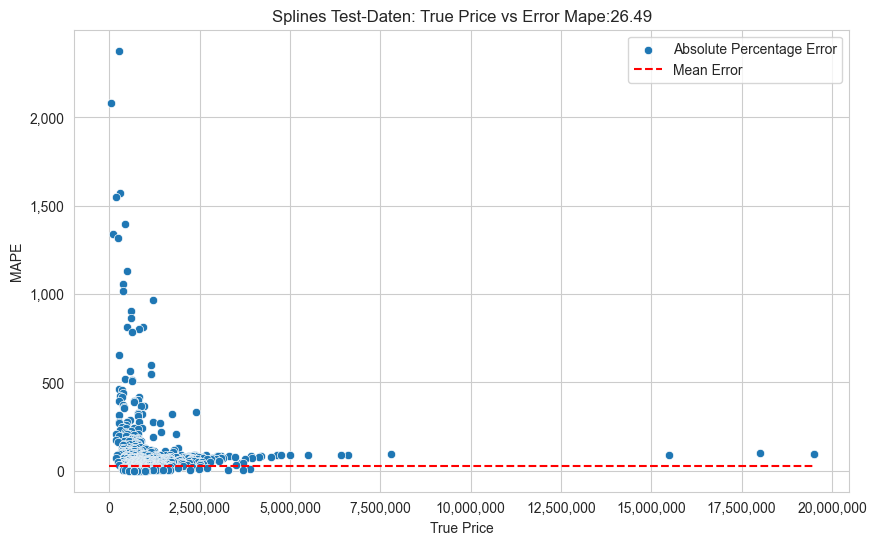

In [15]:
# Plot price vs error
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_df_test['true_price'], y=error_df_test['mape'])
plt.xlabel('True Price')
plt.ylabel('MAPE')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title(f'Splines Test-Daten: True Price vs Error Mape:{round(mape_test, 2)}')
plt.hlines(y=mape_test, xmin=0, xmax=error_df_test['true_price'].max(), color='red', linestyles='dashed')
plt.legend(['Absolute Percentage Error', 'Mean Error'])
plt.show()

Hier sind die gleichen Analysen für die Trainingsdaten durchgeführt.

In [16]:
y_pred = np.exp(model.predict(X_train_np))

error_df_train = analyse_highest_errors(y_train, y_pred, X_train, dp)
error_df_train

Floor  ForestDensityL  ForestDensityM  ForestDensityS  \
15254   0.00            0.14            0.02            0.00   
11631   0.00            0.09            0.02            0.00   
6920    0.00            0.15            0.12            0.03   
8342    0.00            0.07            0.02            0.00   
8445    0.00            0.21            0.13            0.00   
...      ...             ...             ...             ...   
16598   0.00            0.00            0.00            0.00   
16599   0.00            0.35            0.06            0.00   
16608   1.00            0.35            0.05            0.00   
16617   2.00            0.14            0.02            0.00   
16620   0.00            0.43            0.31            0.04   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
15254                    0.05                    0.13                    0.15   
11631                    0.00                    0.00                    0.00   
6920                     0.00                    0.00                    0.00   
8342                     0.00                    0.00                    0.00   
8445                     0.00                    0.00                    0.00   
...                       ...                     ...                     ...   
16598                    0.04                    0.04                    0.00   
16599                    0.00                    0.00                    0.00   
16608                    0.00                    0.00                    0.00   
16617                    0.05                    0.13                    0.15   
16620                    0.00                    0.00                    0.00   

       NoisePollutionRoadL  NoisePollutionRoadM  NoisePollutionRoadS  ...  \
15254                 0.33                 0.30                 0.37  ...   
11631                 0.45                 0.42                 0.50  ...   
6920                  0.30                 0.20                 0.13  ...   
8342                  0.31                 0.38                 0.48  ...   
8445                  0.09                 0.19                 0.31  ...   
...                    ...                  ...                  ...  ...   
16598                 0.52                 0.41                 0.27  ...   
16599                 0.22                 0.22                 0.16  ...   
16608                 0.08                 0.10                 0.03  ...   
16617                 0.33                 0.30                 0.37  ...   
16620                 0.09                 0.09                 0.09  ...   

       region_group_44  region_group_45  region_group_46  region_group_47  \
15254             0.00             0.00            -0.00             0.00   
11631             0.00             0.00            -0.00             0.00   
6920              0.00             0.00            -0.00             0.00   
8342              0.00             0.00            -0.00             0.00   
8445              0.00             0.00            -0.00             0.00   
...                ...              ...              ...              ...   
16598             0.00             0.00            -0.00             0.00   
16599             0.00             0.00            -0.00             0.00   
16608             0.00             0.00            -0.00             0.00   
16617             0.00             0.00            -0.00             0.00   
16620             0.00             0.00            -0.00             0.00   

       region_group_48  region_group_49  true_price  predicted_price  \
15254             0.00             0.00    20000.00       4222318.36   
11631             0.00             0.00   150000.00      21399289.00   
6920              0.00             0.00    30000.00       3765280.18   
8342              0.00             0.00   100000.00      10195065.11   
8445              0.00             0.00    50000.00    

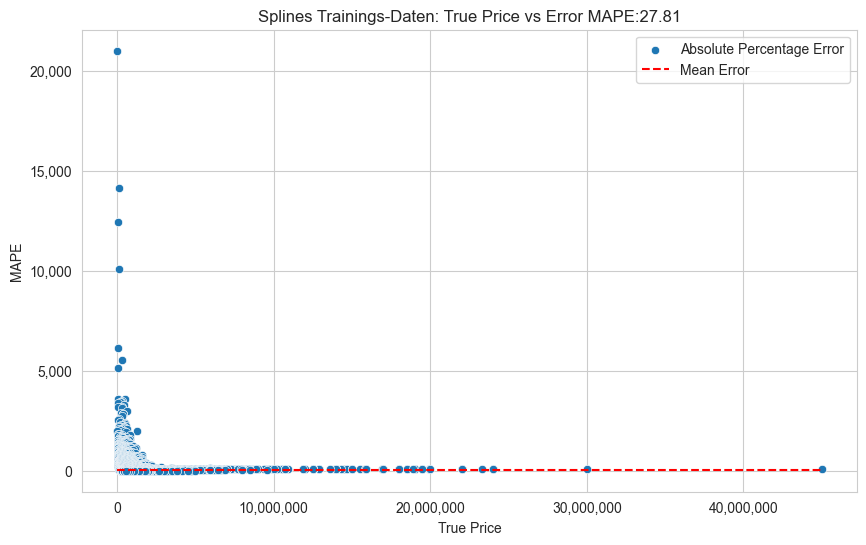

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_df_train['true_price'], y=error_df_train['mape'])
plt.xlabel('True Price')
plt.ylabel('MAPE')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title(f'Splines Trainings-Daten: True Price vs Error MAPE:{round(mape_train, 2)}')
plt.hlines(y=mape_train, xmin=0, xmax=error_df_train['true_price'].max(), color='red', linestyles='dashed')
plt.legend(['Absolute Percentage Error', 'Mean Error'])
plt.show()

## Parameter des Modells

In [12]:
model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    837.6947
Link Function:                     IdentityLink Log Likelihood:                                -44459.8587
Number of Samples:                        16621 AIC:                                            90597.1069
                                                AICc:                                           90686.3578
                                                GCV:                                                0.1356
                                                Scale:                                              0.1234
                                                Pseudo R-Squared:                                    0.804
Feature Function                  Lam

C:\Users\denis\AppData\Local\Temp\ipykernel_22228\3035046171.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model.summary()


Die wichtigsten Features sind hier dargestellt. Die Features sind nach Signifikanz (p-Wert) sortiert.

In [13]:
p_values = model.statistics_['p_values']
p_value_importance = list(zip(feature_names, p_values))
sorted_p_values = sorted(p_value_importance, key=lambda x: x[1])
print("Features nach Signifikanz (p-Werte):")
for feature, p_value in sorted_p_values:
    print(f"{feature}: {p_value:.2e}")

Features nach Signifikanz (p-Werte):
ForestDensityM: 1.11e-16
NoisePollutionRoadL: 1.11e-16
distanceToTrainStation: 1.11e-16
gde_politics_cvp: 1.11e-16
gde_social_help_quota: 1.11e-16
gde_tax: 1.11e-16
Space extracted: 1.11e-16
Plot_area_unified: 1.11e-16
No. of rooms:: 1.11e-16
Year built:: 1.11e-16
type_unified_farmhouse: 1.11e-16
gde_area_agriculture_percentage: 2.22e-16
ForestDensityS: 6.66e-15
gde_foreigners_percentage: 1.74e-14
region_group_12: 5.86e-14
gde_politics_sp: 5.22e-13
gde_area_forest_percentage: 1.98e-12
region_group_42: 4.14e-12
gde_politics_rights: 2.43e-11
ForestDensityL: 1.19e-10
region_group_36: 2.05e-10
gde_area_nonproductive_percentage: 2.23e-10
region_group_26: 3.18e-10
plz_parsed: 1.54e-09
region_group_31: 2.22e-09
Fireplace: 2.30e-09
region_group_48: 5.18e-09
region_group_3: 6.09e-09
gde_politics_fdp: 1.42e-08
gde_average_house_hold: 1.97e-08
region_group_2: 2.40e-08
region_group_7: 2.96e-08
Elevator: 3.27e-08
region_group_27: 6.94e-08
region_group_4: 1.16e-0